<a href="https://colab.research.google.com/github/aditijantikar/LargeLarryModelers/blob/main/Inflammation%20Analysis/Biomarker_Relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from scipy import stats
from scipy.interpolate import interp1d
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [6]:
print("\n1. LS BIOMARKERS TIMESERIES")
df_ts = pd.read_csv('/content/LS Biomarkers Timeseries.csv')
print(f"Shape: {df_ts.shape}")
print(f"Columns: {df_ts.columns.tolist()[:20]}")
print(df_ts.head(3))


1. LS BIOMARKERS TIMESERIES
Shape: (238, 342)
Columns: ['Date collected', 'Units', 'Good Range', '5/1/1993', '11/27/1996', '5/8/1997', '4/15/1998', '4/1/1999', '10/6/1999', '5/7/2001', '11/13/2003', '10/4/2005', '4/17/2007', '4/25/2007', '6/15/2007', '8/28/2007', '11/2/2007', '2/12/2008', '4/8/2008', '6/19/2008']
  Date collected Units Good Range  5/1/1993  11/27/1996  5/8/1997  4/15/1998  \
0            NaN   NaN        NaN       NaN         NaN       NaN        NaN   
1            NaN   NaN        NaN       NaN         NaN       NaN        NaN   
2         Weight   NaN        NaN       NaN         NaN       NaN        NaN   

   4/1/1999  10/6/1999  5/7/2001  ...  2/5/2025  2/12/2025  2/28/2025  \
0       NaN        NaN       NaN  ...  YFH/UCSD       UCSD       UCSD   
1       NaN        NaN       NaN  ...       NaN        NaN        NaN   
2       NaN      202.0     201.0  ...       178        179      179.6   

  5/20/2025  6/13/2025                 Low   High Average Number Unnam

In [7]:
print("\n2. LLM BIOMARKERS LONG")
df_long = pd.read_csv('/content/LLM_Biomarkers_Long.csv')
print(f"Shape: {df_long.shape}")
print(f"Columns: {df_long.columns.tolist()}")
print(df_long.head(3))
print(f"Unique biomarkers: {df_long['Biomarker'].nunique()}")


2. LLM BIOMARKERS LONG
Shape: (22862, 7)
Columns: ['Date', 'Biomarker', 'Value', 'Units', 'Panel', 'GoodRange', 'Facility']
         Date              Biomarker  Value  Units  \
0  1993-05-01  Sum Total Cholesterol  152.0  mg/dL   
1  1996-11-27              A/G ratio    1.3    NaN   
2  1996-11-27                    AST   37.0    U/L   

                           Panel GoodRange  Facility  
0                    LIPID Panel      <199       NaN  
1  Comprehensive Metabolic Panel   1.1-2.3       NaN  
2  Comprehensive Metabolic Panel      0-40       NaN  
Unique biomarkers: 183


In [8]:
print("\n3. LLM BIOMARKERS WIDE")
df_wide = pd.read_csv('/content/LLM_Biomarkers_Wide.csv')
print(f"Shape: {df_wide.shape}")
print(f"Columns: {df_wide.columns.tolist()[:20]}")
print(df_wide.head(3))


3. LLM BIOMARKERS WIDE
Shape: (332, 184)
Columns: ['Date', '% SCFA Acetate', '% SCFA Butyrate', '% SCFA Propionate', '% SCFA Valerate', '237_mg/dL', 'A/G ratio_None', 'ALT_U/L', 'APO A1_mg/dL', 'APOLIPOPROTEIN-(B100)_mg/dL', 'AST/ALT ratio_None', 'AST_U/L', 'Actinomyces neuii_None', 'Actinomyces turicensis_None', 'Albumin_g/dL', 'Alkaline phosphatase_U/L', 'Alpha Lipoic Acid_None', 'Alpha hemolytic strep_None', 'Anion Gap_mmol/L', 'Arcobacter butzieri_None']
         Date  % SCFA Acetate  % SCFA Butyrate  % SCFA Propionate  \
0  1993-05-01             NaN              NaN                NaN   
1  1996-11-27             NaN              NaN                NaN   
2  1997-05-08             NaN              NaN                NaN   

   % SCFA Valerate  237_mg/dL  A/G ratio_None  ALT_U/L  APO A1_mg/dL  \
0              NaN        NaN             NaN      NaN           NaN   
1              NaN        NaN             1.3      NaN           NaN   
2              NaN        NaN             N

In [9]:
print("\n4. LLM GUT MICROBIOME LONG")
df_micro_long = pd.read_csv('/content/LLM_Gut_Microbiome_Long.csv')
print(f"Shape: {df_micro_long.shape}")
print(f"Columns: {df_micro_long.columns.tolist()}")
print(df_micro_long.head(3))
print(f"Unique species: {df_micro_long['Species'].nunique() if 'Species' in df_micro_long.columns else 'N/A'}")


4. LLM GUT MICROBIOME LONG
Shape: (15825, 7)
Columns: ['Date', 'Species', 'Abundance', 'Panel', 'DominantSpecies', 'HealthyAverage', 'HealthyMax']
       Date                      Species  Abundance  \
0  12/28/11  Adlercreutzia_equolifaciens      0.031   
1  12/28/11       Aeromonas_unclassified      0.000   
2  12/28/11       Aggregatibacter_segnis      0.000   

                               Panel DominantSpecies  HealthyAverage  \
0  Xin Fang MetaphlAN 2 Metagenomics             NaN             NaN   
1  Xin Fang MetaphlAN 2 Metagenomics             NaN             NaN   
2  Xin Fang MetaphlAN 2 Metagenomics             NaN             NaN   

   HealthyMax  
0         NaN  
1         NaN  
2         NaN  
Unique species: 229


In [10]:
print("\n5. LLM GUT MICROBIOME WIDE")
df_micro_wide = pd.read_csv('/content/LLM_Gut_Microbiome_Wide.csv')
print(f"Shape: {df_micro_wide.shape}")
print(f"Columns: {df_micro_wide.columns.tolist()[:20]}")
print(df_micro_wide.head(3))


5. LLM GUT MICROBIOME WIDE
Shape: (229, 160)
Columns: ['Species', '12/28/11', '4/3/12', '8/7/12', '11/6/12', '1/26/13', '2/8/13', '2/5/13', '3/24/13', '4/7/13', '4/29/13', '7/14/13', '9/3/13', '9/24/13', '11/10/13', '12/14/13', '1/19/14', '2/17/14', '3/23/14', '5/4/14']
                       Species  12/28/11  4/3/12  8/7/12  11/6/12  1/26/13  \
0  Adlercreutzia_equolifaciens     0.031   0.035   0.143    0.064    0.041   
1       Aeromonas_unclassified     0.000   0.000   0.000    0.000    0.000   
2       Aggregatibacter_segnis     0.000   0.000   0.000    0.000    0.000   

   2/8/13  2/5/13  3/24/13  4/7/13  ...  4/14/19  4/28/19  5/12/19  5/19/19  \
0   0.036     NaN    0.008   0.006  ...      NaN      NaN      NaN      NaN   
1   0.000     NaN    0.000   0.000  ...      NaN      NaN      NaN      NaN   
2   0.014     NaN    0.015   0.562  ...      NaN      NaN      NaN      NaN   

   6/2/19  6/16/19  6/23/19  7/14/19  7/28/19  8/11/19  
0     NaN      NaN      NaN      NaN     

In [12]:
df_long = pd.read_csv('/content/LLM_Biomarkers_Long.csv')
df_long['Date'] = pd.to_datetime(df_long['Date'])

print(f"\n Loaded {len(df_long)} measurements")
print(f" Date range: {df_long['Date'].min().date()} to {df_long['Date'].max().date()}")
print(f" Unique biomarkers: {df_long['Biomarker'].nunique()}")
print(f" Time span: {(df_long['Date'].max() - df_long['Date'].min()).days / 365.25:.1f} years")



 Loaded 22862 measurements
 Date range: 1993-05-01 to 2025-06-13
 Unique biomarkers: 183
 Time span: 32.1 years


In [14]:
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

biomarker_counts = df_long.groupby('Biomarker').agg({
    'Value': ['count', 'mean', 'std', 'min', 'max'],
    'Date': ['min', 'max']
}).round(2)

biomarker_counts.columns = ['Count', 'Mean', 'Std', 'Min', 'Max', 'First_Date', 'Last_Date']
biomarker_counts = biomarker_counts.sort_values('Count', ascending=False)

print("\nTop 20 biomarkers by measurement frequency:")
print(biomarker_counts.head(20))

# Primary markers for our hypothesis
PRIMARY_MARKERS = ['Calprotectin', 'Hemoglobin']
SECONDARY_MARKERS = ['C-Reactive Protein', 'Ferritin', 'WBC']



Top 20 biomarkers by measurement frequency:
                                              Count    Mean     Std     Min  \
Biomarker                                                                     
Weight                                          322  185.60    7.41  166.10   
% SCFA Butyrate                                 184   16.57    4.26    7.00   
% SCFA Acetate                                  184   62.30    5.92   40.00   
% SCFA Valerate                                 184    3.89    0.89    1.00   
Butyrate                                        184    1.29    0.72    0.27   
Stool SIgA                                      184  185.68  268.70    7.40   
% SCFA Propionate                               184   17.40    4.00    9.40   
Stool Lactoferrin                               184   43.89  101.95    0.50   
Stool Lysozyme                                  184  442.55  487.58   35.00   
Total SCFA                                      184    7.49    2.84    2.50   
pH     

In [16]:
print("KEY MARKERS FOR TEMPORAL HYPOTHESIS:")

for marker in PRIMARY_MARKERS + SECONDARY_MARKERS:
    if marker in df_long['Biomarker'].values:
        marker_data = df_long[df_long['Biomarker'] == marker]
        print(f"\n {marker}:")
        print(f"  Measurements: {len(marker_data)}")
        print(f"  Date range: {marker_data['Date'].min().date()} to {marker_data['Date'].max().date()}")
        print(f"  Mean ± SD: {marker_data['Value'].mean():.2f} ± {marker_data['Value'].std():.2f}")
        print(f"  Units: {marker_data['Units'].iloc[0] if not marker_data['Units'].isna().all() else 'Not specified'}")
    else:
        print(f"\n {marker}: NOT FOUND in dataset")
        # trying to find similar names
        similar = [b for b in df_long['Biomarker'].unique() if marker.lower() in b.lower()]
        if similar:
            print(f"  Similar biomarkers found: {similar}")


KEY MARKERS FOR TEMPORAL HYPOTHESIS:

 Calprotectin: NOT FOUND in dataset
  Similar biomarkers found: ['Stool Calprotectin UCSD', 'Stool Calprotectin YFH']

 Hemoglobin: NOT FOUND in dataset
  Similar biomarkers found: ['Hemoglobin A1C']

 C-Reactive Protein: NOT FOUND in dataset

 Ferritin:
  Measurements: 50
  Date range: 2001-05-07 to 2025-06-13
  Mean ± SD: 69.74 ± 30.91
  Units: ng/mL

 WBC: NOT FOUND in dataset
  Similar biomarkers found: ['WBC-']


In [19]:
hgb_search = [b for b in df_long['Biomarker'].unique()
              if any(term in b.lower() for term in ['hgb', 'hb ', 'hemoglobin', 'haemoglobin'])]
print("All Hgb-related:", hgb_search)

cbc_markers = [b for b in df_long['Biomarker'].unique()
               if any(term in b.lower() for term in ['rbc', 'red blood', 'hematocrit', 'hct'])]
print("CBC markers:", cbc_markers)

anemia_markers = [b for b in df_long['Biomarker'].unique()
                  if any(term in b.lower() for term in ['anemia', 'blood count', 'erythrocyte'])]
print("Anemia-related:", anemia_markers)

All Hgb-related: ['HGB-', 'Hemoglobin A1C']
CBC markers: ['HCT', 'RBC-']
Anemia-related: []


In [21]:
print("EXTRACTING BIOMARKERS WITH CORRECT NAMES")

calprotectin_ucsd = df_long[df_long['Biomarker'] == 'Stool Calprotectin UCSD'].copy()
calprotectin_yfh = df_long[df_long['Biomarker'] == 'Stool Calprotectin YFH'].copy()
calprotectin = pd.concat([calprotectin_ucsd, calprotectin_yfh])
calprotectin['Biomarker'] = 'Calprotectin'  # Standardize
calprotectin = calprotectin.sort_values('Date')

print(f"\n Calprotectin: {len(calprotectin)} measurements (combined)")
print(f"  UCSD: {len(calprotectin_ucsd)}, YFH: {len(calprotectin_yfh)}")
print(f"  Range: {calprotectin['Date'].min().date()} to {calprotectin['Date'].max().date()}")
print(f"  Mean ± SD: {calprotectin['Value'].mean():.2f} ± {calprotectin['Value'].std():.2f} μg/g")


EXTRACTING BIOMARKERS WITH CORRECT NAMES

 Calprotectin: 223 measurements (combined)
  UCSD: 79, YFH: 144
  Range: 2011-11-18 to 2025-06-13
  Mean ± SD: 97.66 ± 235.36 μg/g


In [22]:
hemoglobin = df_long[df_long['Biomarker'] == 'HGB-'].copy()
hemoglobin['Biomarker'] = 'Hemoglobin'
print(f"\n Hemoglobin: {len(hemoglobin)} measurements")
print(f"  Range: {hemoglobin['Date'].min().date()} to {hemoglobin['Date'].max().date()}")
print(f"  Mean ± SD: {hemoglobin['Value'].mean():.2f} ± {hemoglobin['Value'].std():.2f} g/dL")



 Hemoglobin: 149 measurements
  Range: 1996-11-27 to 2025-06-13
  Mean ± SD: 14.74 ± 1.22 g/dL


In [23]:
albumin = df_long[df_long['Biomarker'] == 'Albumin'].copy()
print(f"\n Albumin: {len(albumin)} measurements")
print(f"  Range: {albumin['Date'].min().date()} to {albumin['Date'].max().date()}")
print(f"  Mean ± SD: {albumin['Value'].mean():.2f} ± {albumin['Value'].std():.2f} g/dL")
print(f"  Low albumin = systemic inflammation (inverse marker)")



 Albumin: 162 measurements
  Range: 1996-11-27 to 2025-06-13
  Mean ± SD: 4.42 ± 0.32 g/dL
  Low albumin = systemic inflammation (inverse marker)


In [24]:
ferritin = df_long[df_long['Biomarker'] == 'Ferritin'].copy()
print(f"\n Ferritin: {len(ferritin)} measurements")
print(f"  Range: {ferritin['Date'].min().date()} to {ferritin['Date'].max().date()}")
print(f"  Mean ± SD: {ferritin['Value'].mean():.2f} ± {ferritin['Value'].std():.2f} ng/mL")



 Ferritin: 50 measurements
  Range: 2001-05-07 to 2025-06-13
  Mean ± SD: 69.74 ± 30.91 ng/mL


In [25]:
wbc = df_long[df_long['Biomarker'] == 'WBC-'].copy()
wbc['Biomarker'] = 'WBC'
print(f"\n WBC: {len(wbc)} measurements")
print(f"  Range: {wbc['Date'].min().date()} to {wbc['Date'].max().date()}")
print(f"  Mean ± SD: {wbc['Value'].mean():.2f} ± {wbc['Value'].std():.2f} 10^3/μL")


 WBC: 150 measurements
  Range: 1996-11-27 to 2025-06-13
  Mean ± SD: 4.87 ± 1.11 10^3/μL


In [26]:
print("TEMPORAL OVERLAP ANALYSIS")

def get_overlap(df1, df2, name1, name2):
    """Check date overlap between two biomarkers"""
    dates1 = set(df1['Date'].dt.date)
    dates2 = set(df2['Date'].dt.date)
    overlap = dates1.intersection(dates2)
    print(f"\n{name1} ↔ {name2}:")
    print(f"  Simultaneous measurements: {len(overlap)} dates")
    print(f"  Date span overlap: {min(max(dates1), max(dates2)) - max(min(dates1), min(dates2))}")
    return len(overlap)

# Check all key pairs
get_overlap(calprotectin, hemoglobin, "Calprotectin", "Hemoglobin")
get_overlap(calprotectin, albumin, "Calprotectin", "Albumin")
get_overlap(calprotectin, ferritin, "Calprotectin", "Ferritin")
get_overlap(albumin, hemoglobin, "Albumin", "Hemoglobin")
get_overlap(ferritin, hemoglobin, "Ferritin", "Hemoglobin")

TEMPORAL OVERLAP ANALYSIS

Calprotectin ↔ Hemoglobin:
  Simultaneous measurements: 83 dates
  Date span overlap: 4956 days, 0:00:00

Calprotectin ↔ Albumin:
  Simultaneous measurements: 83 dates
  Date span overlap: 4956 days, 0:00:00

Calprotectin ↔ Ferritin:
  Simultaneous measurements: 34 dates
  Date span overlap: 4956 days, 0:00:00

Albumin ↔ Hemoglobin:
  Simultaneous measurements: 131 dates
  Date span overlap: 10425 days, 0:00:00

Ferritin ↔ Hemoglobin:
  Simultaneous measurements: 44 dates
  Date span overlap: 8803 days, 0:00:00


44

In [27]:
print("CLINICAL THRESHOLD ANALYSIS")

# Calprotectin thresholds
print("\nCALPROTECTIN (Inflammation):")
normal = (calprotectin['Value'] <= 50).sum()
borderline = ((calprotectin['Value'] > 50) & (calprotectin['Value'] <= 150)).sum()
high = ((calprotectin['Value'] > 150) & (calprotectin['Value'] <= 500)).sum()
very_high = (calprotectin['Value'] > 500).sum()

total_calp = len(calprotectin)
print(f"  Normal (≤50 μg/g): {normal} ({normal/total_calp*100:.1f}%)")
print(f"  Borderline (50-150 μg/g): {borderline} ({borderline/total_calp*100:.1f}%)")
print(f"  High (150-500 μg/g): {high} ({high/total_calp*100:.1f}%)")
print(f"  Very High (>500 μg/g): {very_high} ({very_high/total_calp*100:.1f}%)")
print(f"  Active inflammation (>150): {high + very_high} ({(high + very_high)/total_calp*100:.1f}%)")


CLINICAL THRESHOLD ANALYSIS

CALPROTECTIN (Inflammation):
  Normal (≤50 μg/g): 141 (63.2%)
  Borderline (50-150 μg/g): 47 (21.1%)
  High (150-500 μg/g): 27 (12.1%)
  Very High (>500 μg/g): 8 (3.6%)
  Active inflammation (>150): 35 (15.7%)


In [28]:
# Hemoglobin thresholds
print("\nHEMOGLOBIN (Anemia):")
severe = (hemoglobin['Value'] < 8.0).sum()
moderate = ((hemoglobin['Value'] >= 8.0) & (hemoglobin['Value'] < 10.0)).sum()
mild = ((hemoglobin['Value'] >= 10.0) & (hemoglobin['Value'] < 12.0)).sum()
borderline_hgb = ((hemoglobin['Value'] >= 12.0) & (hemoglobin['Value'] < 13.5)).sum()
normal_hgb = (hemoglobin['Value'] >= 13.5).sum()

total_hgb = len(hemoglobin)
print(f"  Severe anemia (<8.0 g/dL): {severe} ({severe/total_hgb*100:.1f}%)")
print(f"  Moderate anemia (8.0-10.0 g/dL): {moderate} ({moderate/total_hgb*100:.1f}%)")
print(f"  Mild anemia (10.0-12.0 g/dL): {mild} ({mild/total_hgb*100:.1f}%)")
print(f"  Borderline (12.0-13.5 g/dL): {borderline_hgb} ({borderline_hgb/total_hgb*100:.1f}%)")
print(f"  Normal (≥13.5 g/dL): {normal_hgb} ({normal_hgb/total_hgb*100:.1f}%)")
print(f"  Any level ofanemia (<12.0): {severe + moderate + mild} ({(severe + moderate + mild)/total_hgb*100:.1f}%)")



HEMOGLOBIN (Anemia):
  Severe anemia (<8.0 g/dL): 0 (0.0%)
  Moderate anemia (8.0-10.0 g/dL): 3 (2.0%)
  Mild anemia (10.0-12.0 g/dL): 5 (3.4%)
  Borderline (12.0-13.5 g/dL): 5 (3.4%)
  Normal (≥13.5 g/dL): 136 (91.3%)
  Any level ofanemia (<12.0): 8 (5.4%)


In [29]:
print("\nALBUMIN (Liver/Systemic):")
low_alb = (albumin['Value'] < 3.5).sum()
normal_alb = (albumin['Value'] >= 3.5).sum()

total_alb = len(albumin)
print(f"  Low (<3.5 g/dL): {low_alb} ({low_alb/total_alb*100:.1f}%)")
print(f"  Normal (≥3.5 g/dL): {normal_alb} ({normal_alb/total_alb*100:.1f}%)")
print(f"  Systemic inflammation indicated: {low_alb} events")



ALBUMIN (Liver/Systemic):
  Low (<3.5 g/dL): 1 (0.6%)
  Normal (≥3.5 g/dL): 161 (99.4%)
  Systemic inflammation indicated: 1 events


In [30]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11

In [31]:
print("DATA CHARACHTERISATION VISUALIZATIONS")

DATA CHARACHTERISATION VISUALIZATIONS


 Saved: Fig1A_Calprotectin_Full.png


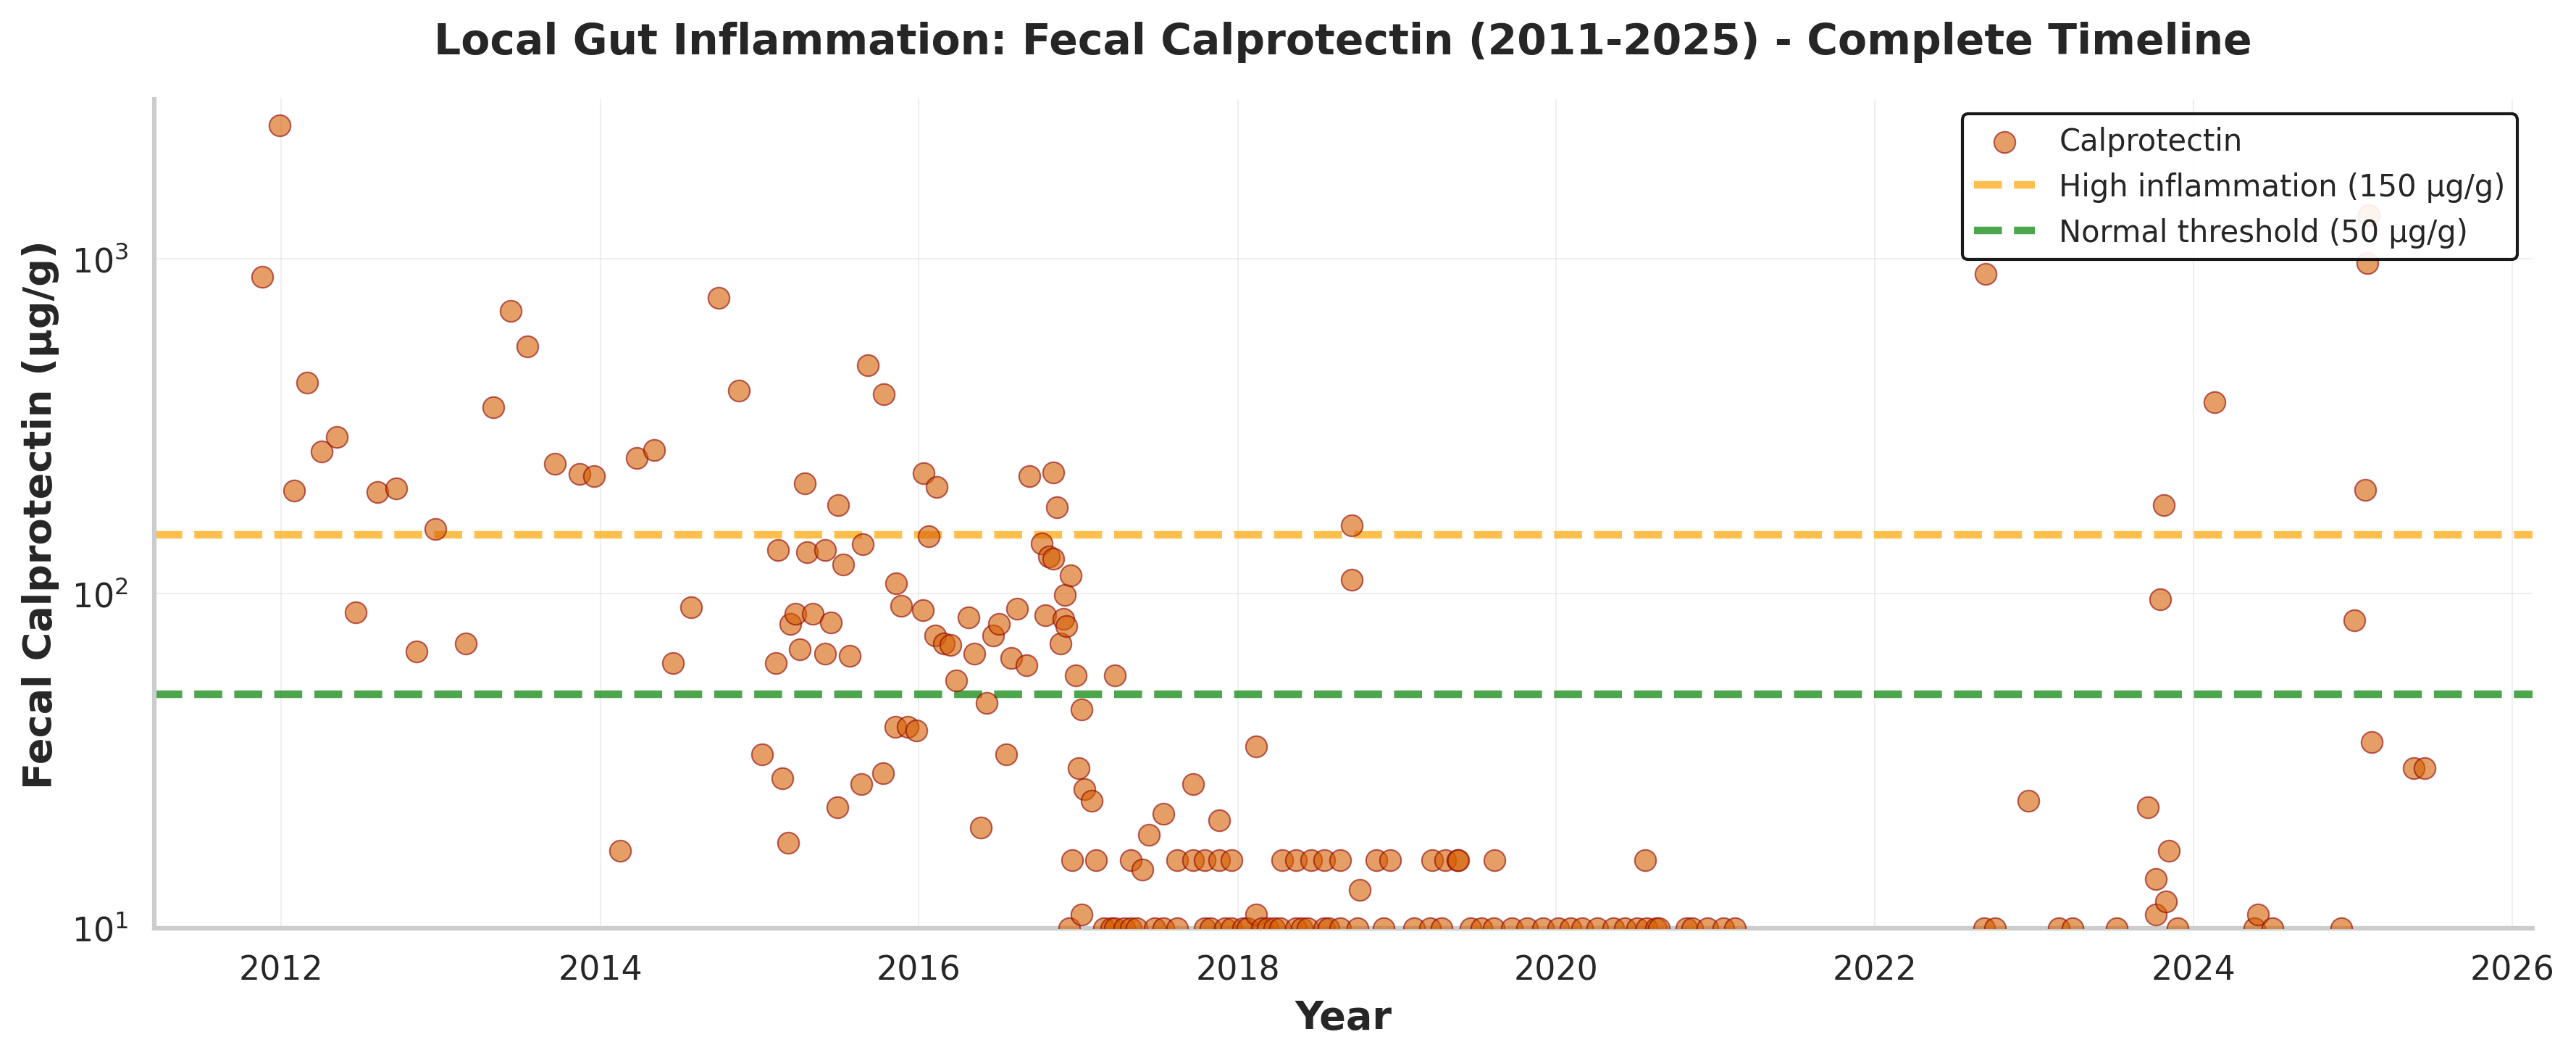

 Saved: Fig1B_Calprotectin_Recent.png


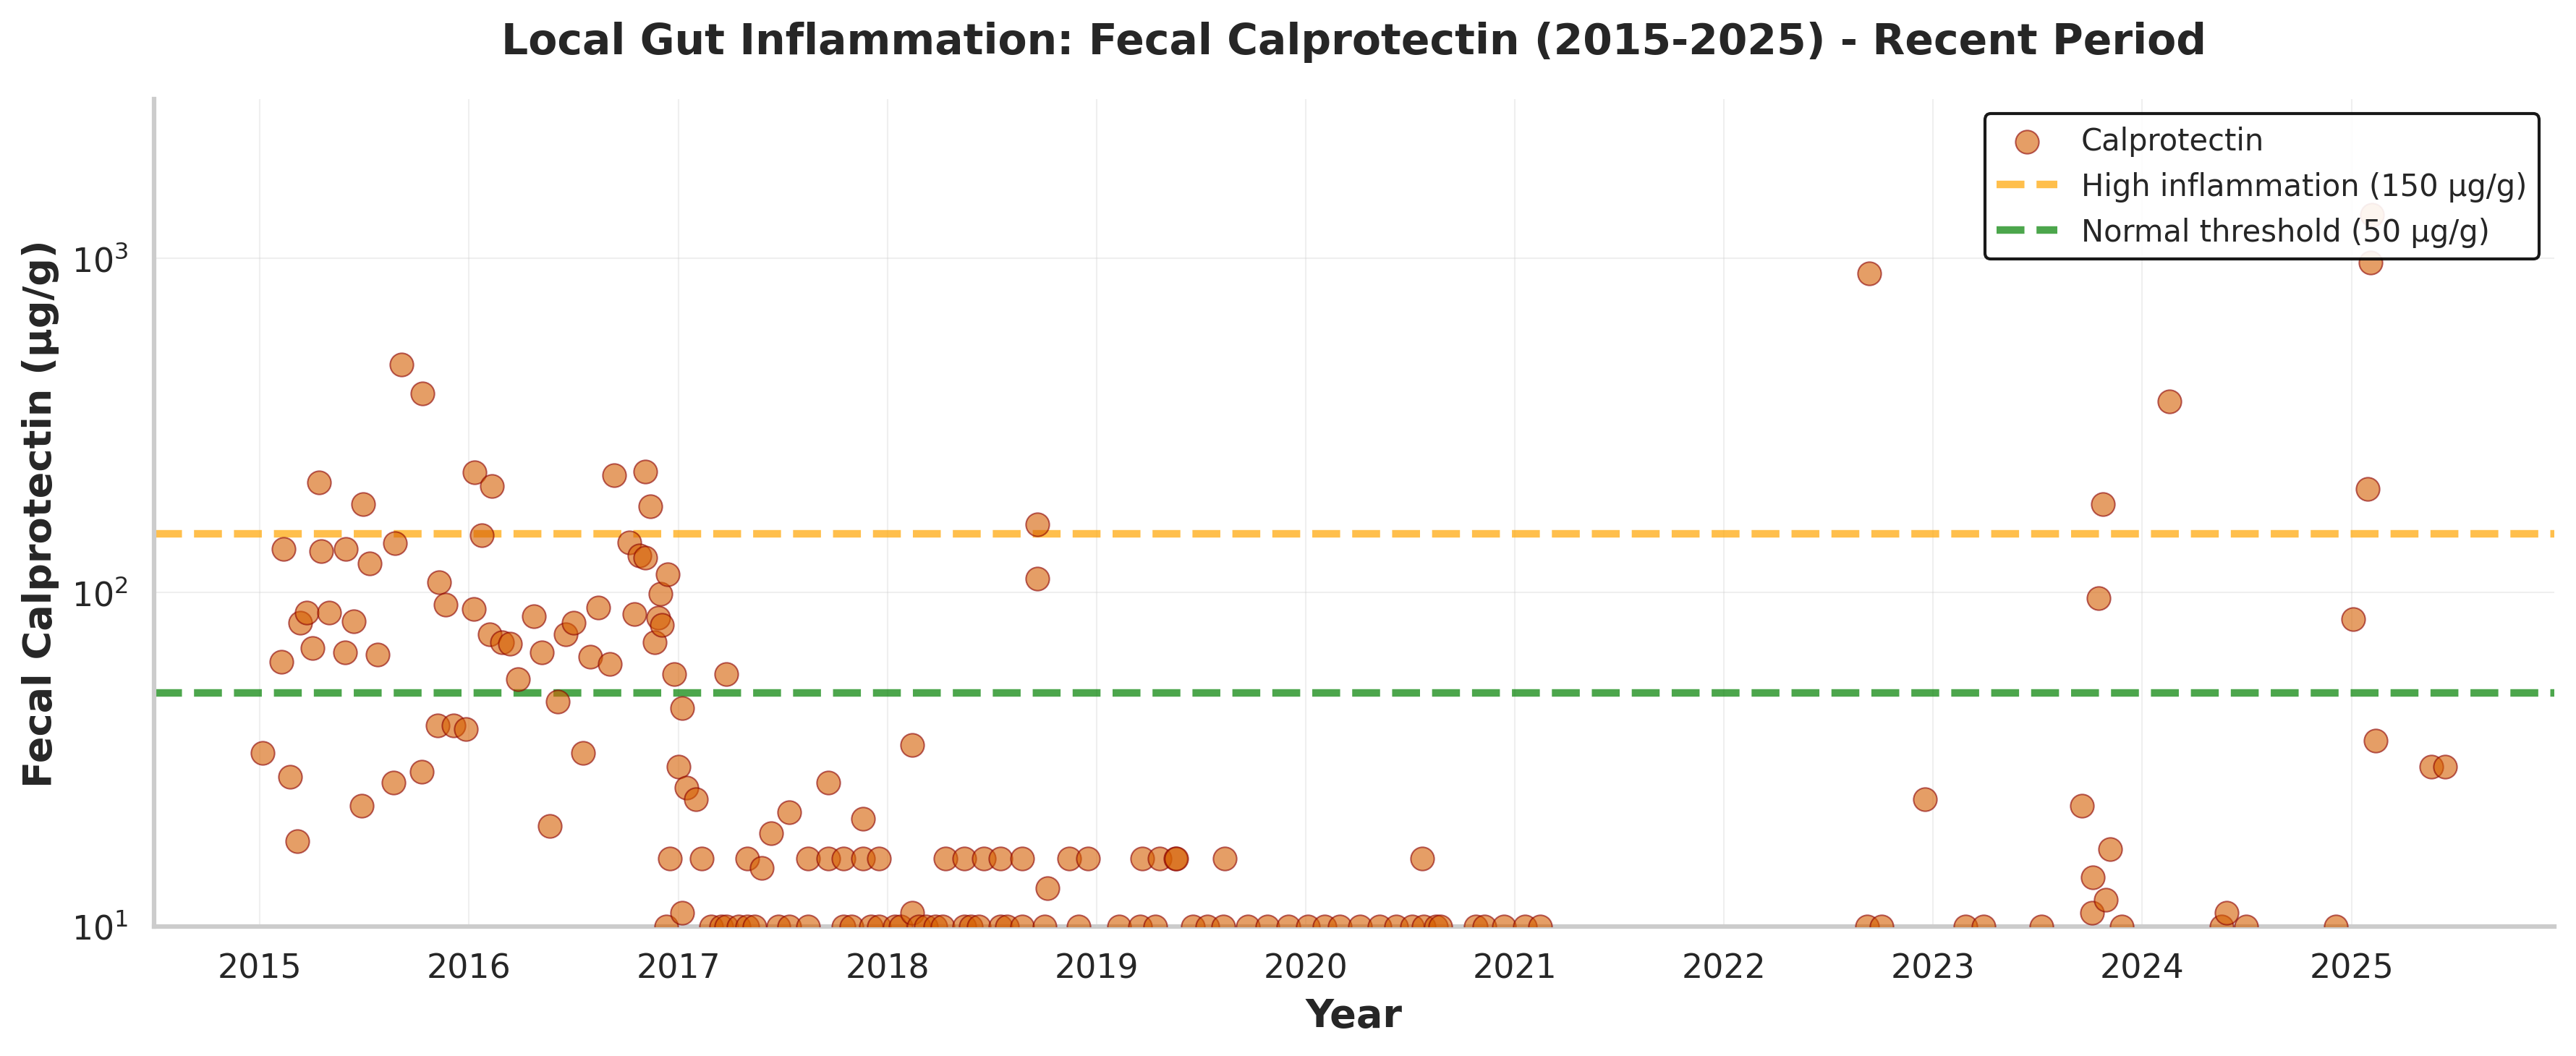

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1.5, 'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})

# Use ALL calprotectin data (starts 2011)
fig, ax = plt.subplots(figsize=(12, 5))

ax.scatter(calprotectin['Date'], calprotectin['Value'],
          s=50, color='#D55E00', alpha=0.6,
          edgecolors='darkred', linewidth=0.5, zorder=3, label='Calprotectin')

ax.axhline(150, color='orange', linestyle='--', linewidth=2.5,
          alpha=0.7, label='High inflammation (150 μg/g)', zorder=2)
ax.axhline(50, color='green', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Normal threshold (50 μg/g)', zorder=2)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Fecal Calprotectin (μg/g)', fontsize=13, fontweight='bold')
ax.set_title('Local Gut Inflammation: Fecal Calprotectin (2011-2025) - Complete Timeline',
            fontsize=14, fontweight='bold', pad=15)
ax.set_yscale('log')
ax.set_ylim([10, 3000])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig1A_Calprotectin_Full.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig1A_Calprotectin_Full.png")
plt.show()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1.5})

# Filter 2015+
recent_start = pd.to_datetime('2015-01-01')
calp_recent = calprotectin[calprotectin['Date'] >= recent_start]

fig, ax = plt.subplots(figsize=(12, 5))

ax.scatter(calp_recent['Date'], calp_recent['Value'],
          s=60, color='#D55E00', alpha=0.6,
          edgecolors='darkred', linewidth=0.5, zorder=3, label='Calprotectin')

ax.axhline(150, color='orange', linestyle='--', linewidth=2.5,
          alpha=0.7, label='High inflammation (150 μg/g)', zorder=2)
ax.axhline(50, color='green', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Normal threshold (50 μg/g)', zorder=2)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Fecal Calprotectin (μg/g)', fontsize=13, fontweight='bold')
ax.set_title('Local Gut Inflammation: Fecal Calprotectin (2015-2025) - Recent Period',
            fontsize=14, fontweight='bold', pad=15)
ax.set_yscale('log')
ax.set_ylim([10, 3000])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig1B_Calprotectin_Recent.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig1B_Calprotectin_Recent.png")
plt.show()

 Saved: Fig2A_Hemoglobin_Full.png


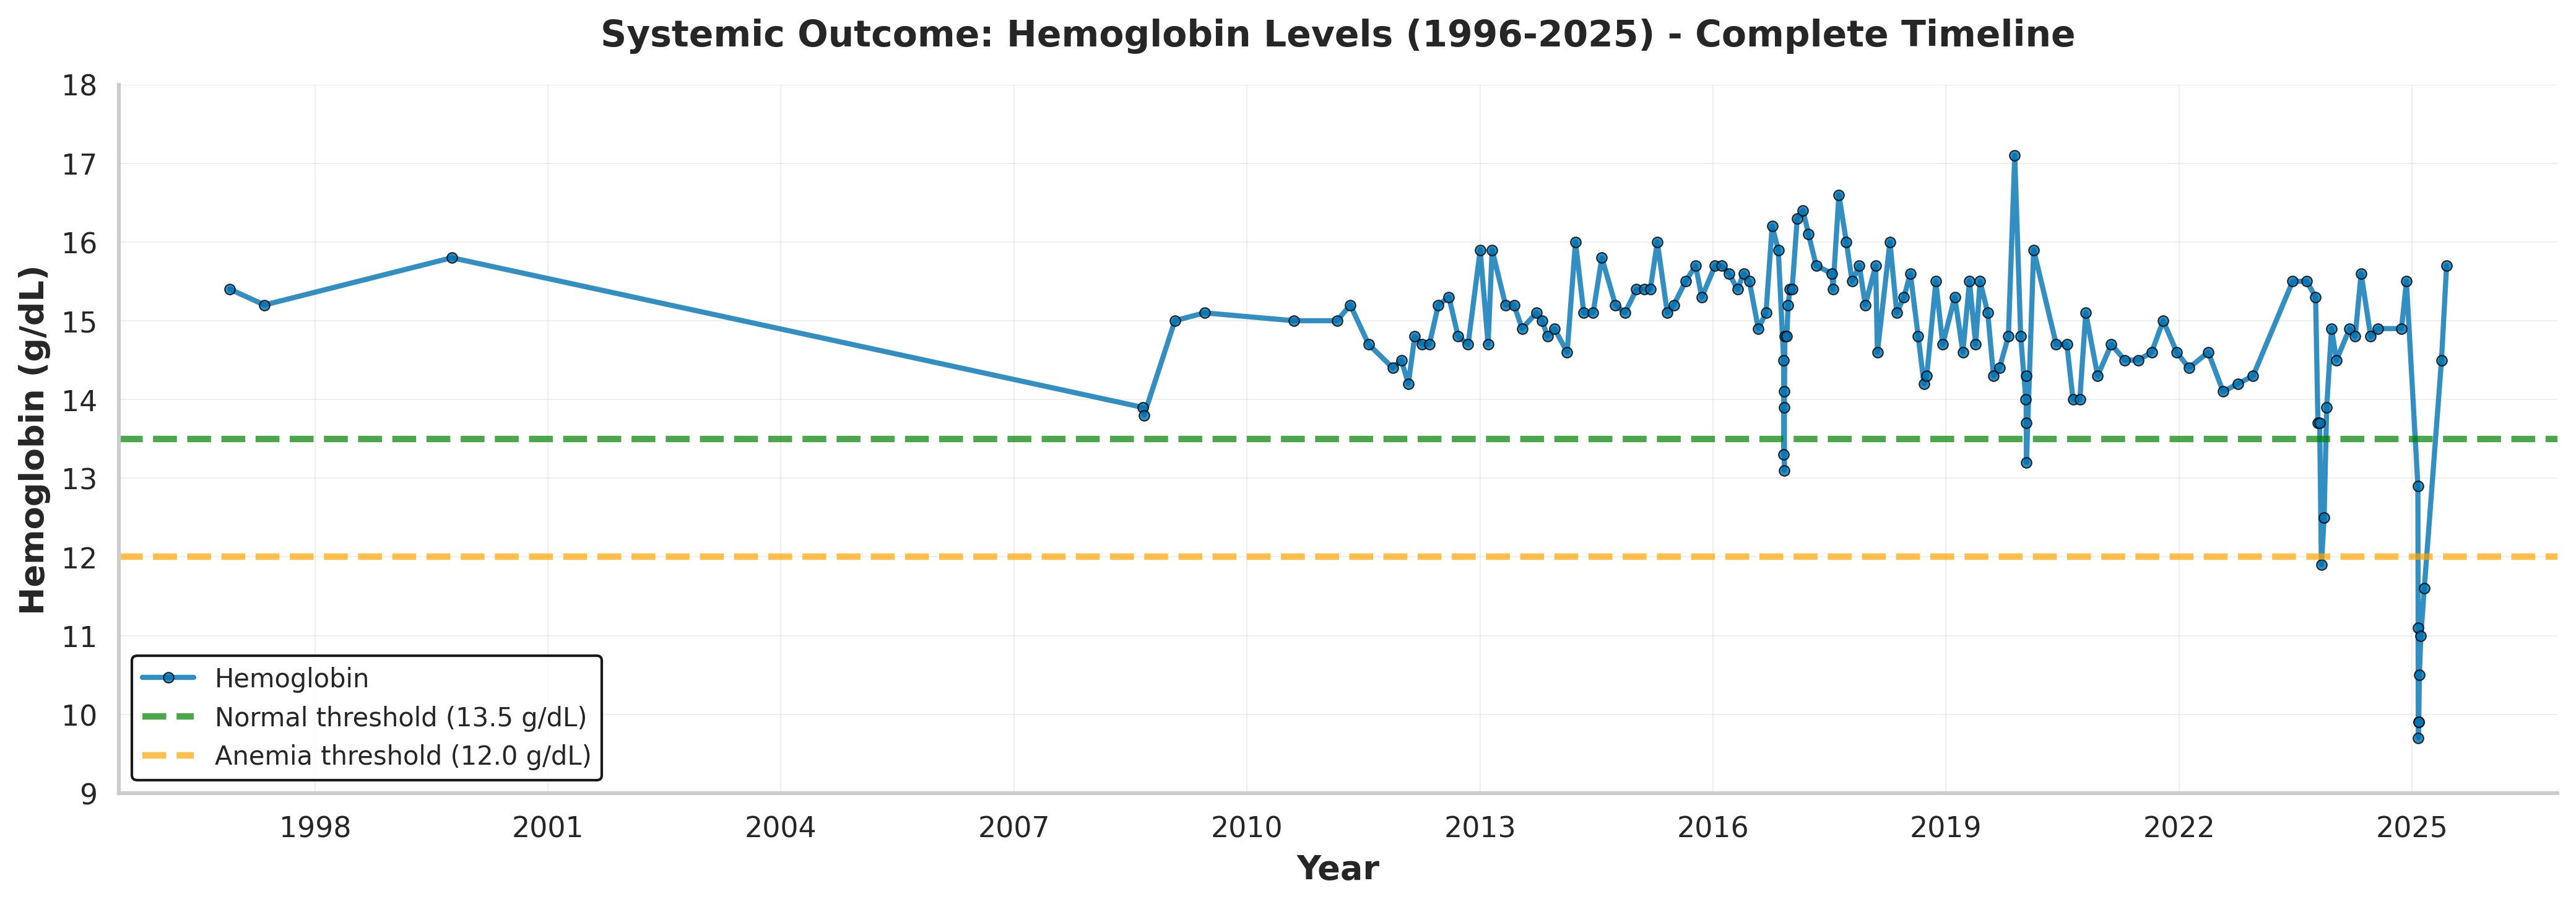

 Saved: Fig2B_Hemoglobin_Recent.png


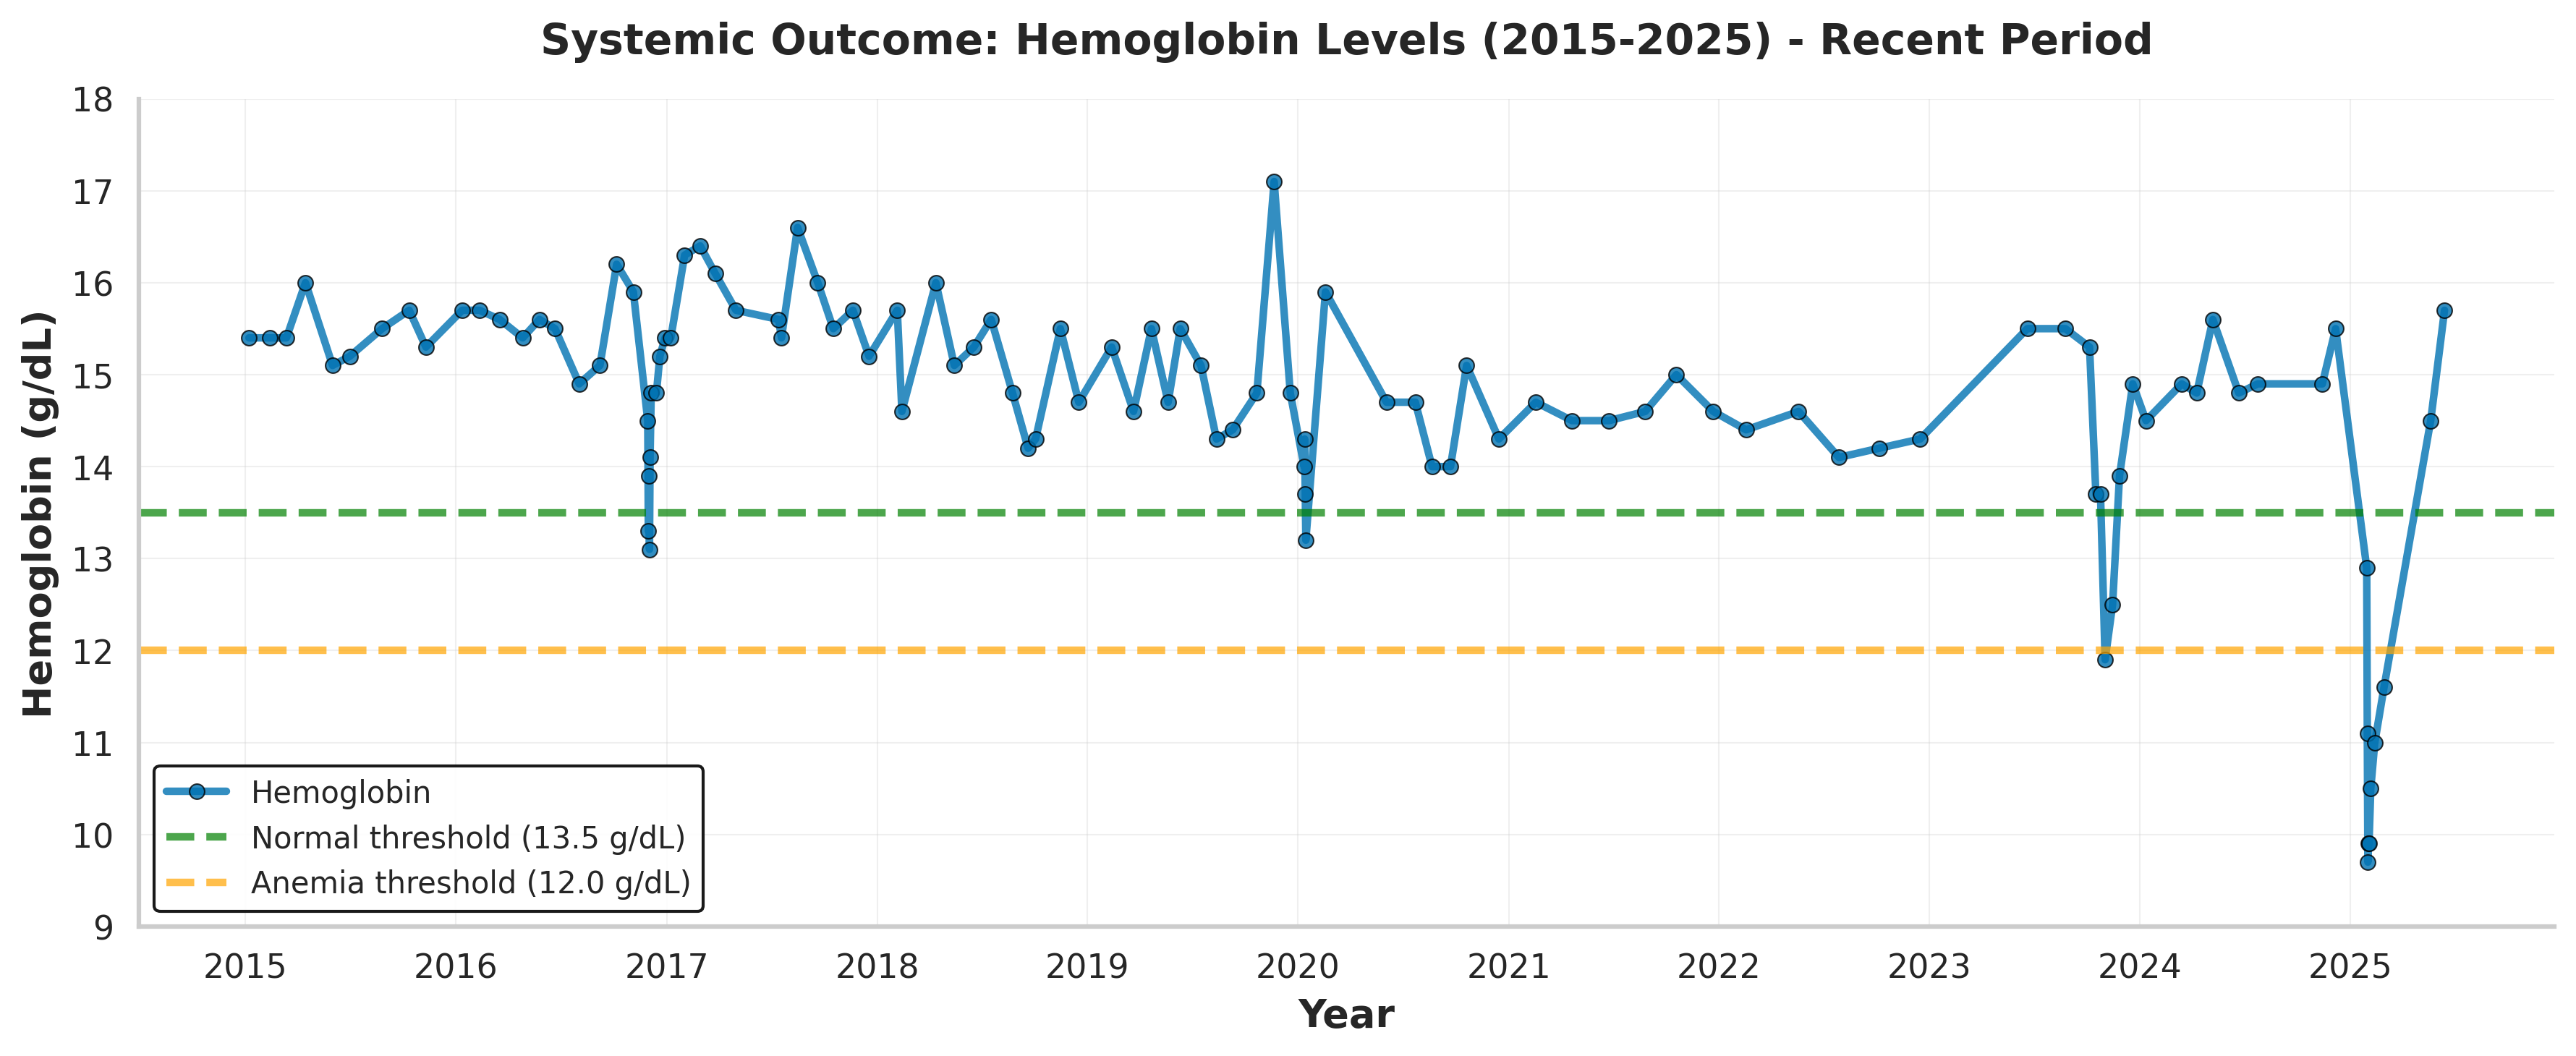

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1.5, 'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})

# Use ALL hemoglobin data
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(hemoglobin['Date'], hemoglobin['Value'],
       color='#0072B2', linewidth=2, marker='o',
       markersize=4, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='Hemoglobin')

ax.axhline(13.5, color='green', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Normal threshold (13.5 g/dL)')
ax.axhline(12.0, color='orange', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Anemia threshold (12.0 g/dL)')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Hemoglobin (g/dL)', fontsize=13, fontweight='bold')
ax.set_title('Systemic Outcome: Hemoglobin Levels (1996-2025) - Complete Timeline',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([9, 18])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(3))

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='lower left', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig2A_Hemoglobin_Full.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig2A_Hemoglobin_Full.png")
plt.show()



# Filter 2015+
recent_start = pd.to_datetime('2015-01-01')
hgb_recent = hemoglobin[hemoglobin['Date'] >= recent_start]

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(hgb_recent['Date'], hgb_recent['Value'],
       color='#0072B2', linewidth=2.5, marker='o',
       markersize=5, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='Hemoglobin')

ax.axhline(13.5, color='green', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Normal threshold (13.5 g/dL)')
ax.axhline(12.0, color='orange', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Anemia threshold (12.0 g/dL)')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Hemoglobin (g/dL)', fontsize=13, fontweight='bold')
ax.set_title('Systemic Outcome: Hemoglobin Levels (2015-2025) - Recent Period',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([9, 18])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='lower left', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig2B_Hemoglobin_Recent.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig2B_Hemoglobin_Recent.png")
plt.show()

 Saved: Fig3A_Albumin_Full.png


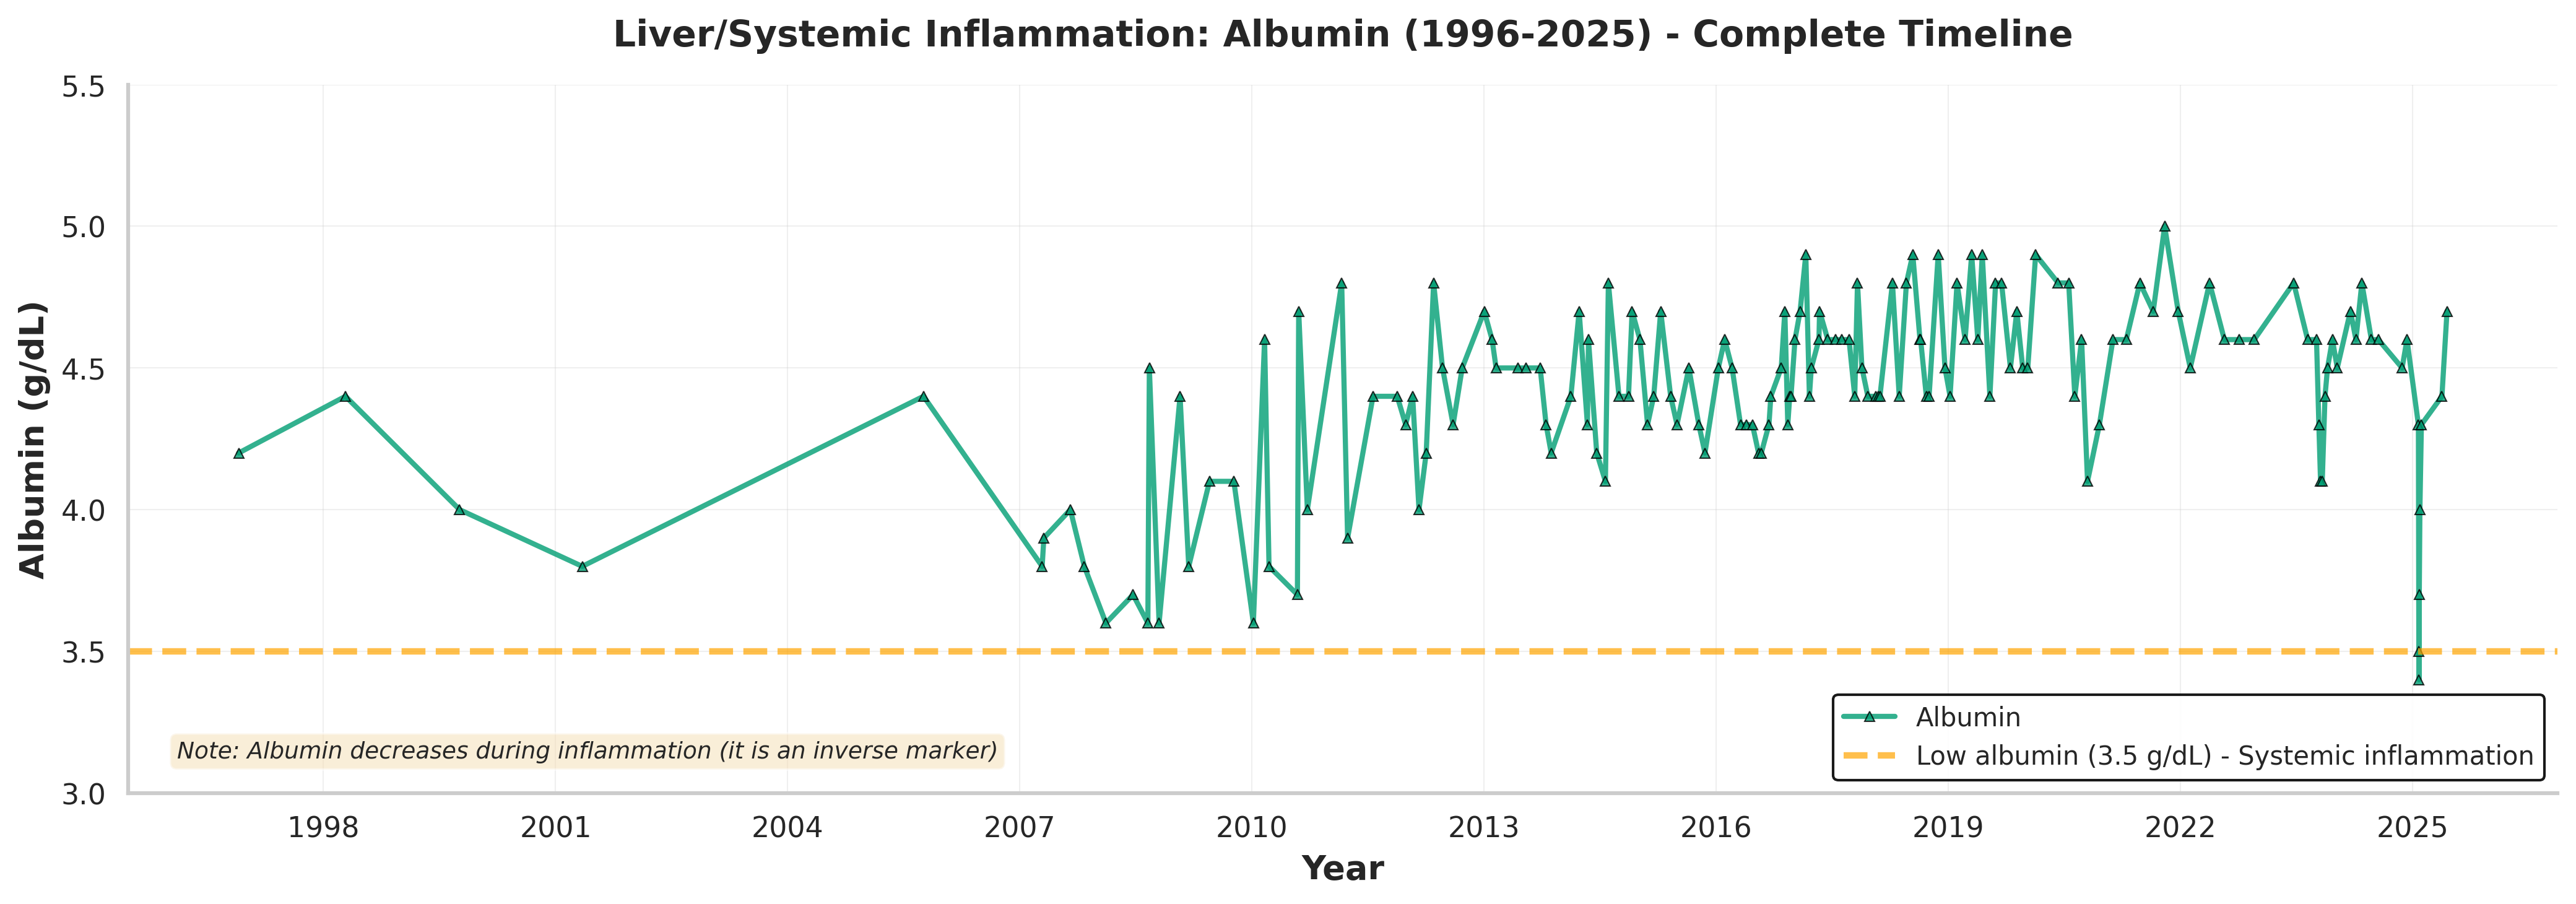

 Saved: Fig3B_Albumin_Recent.png


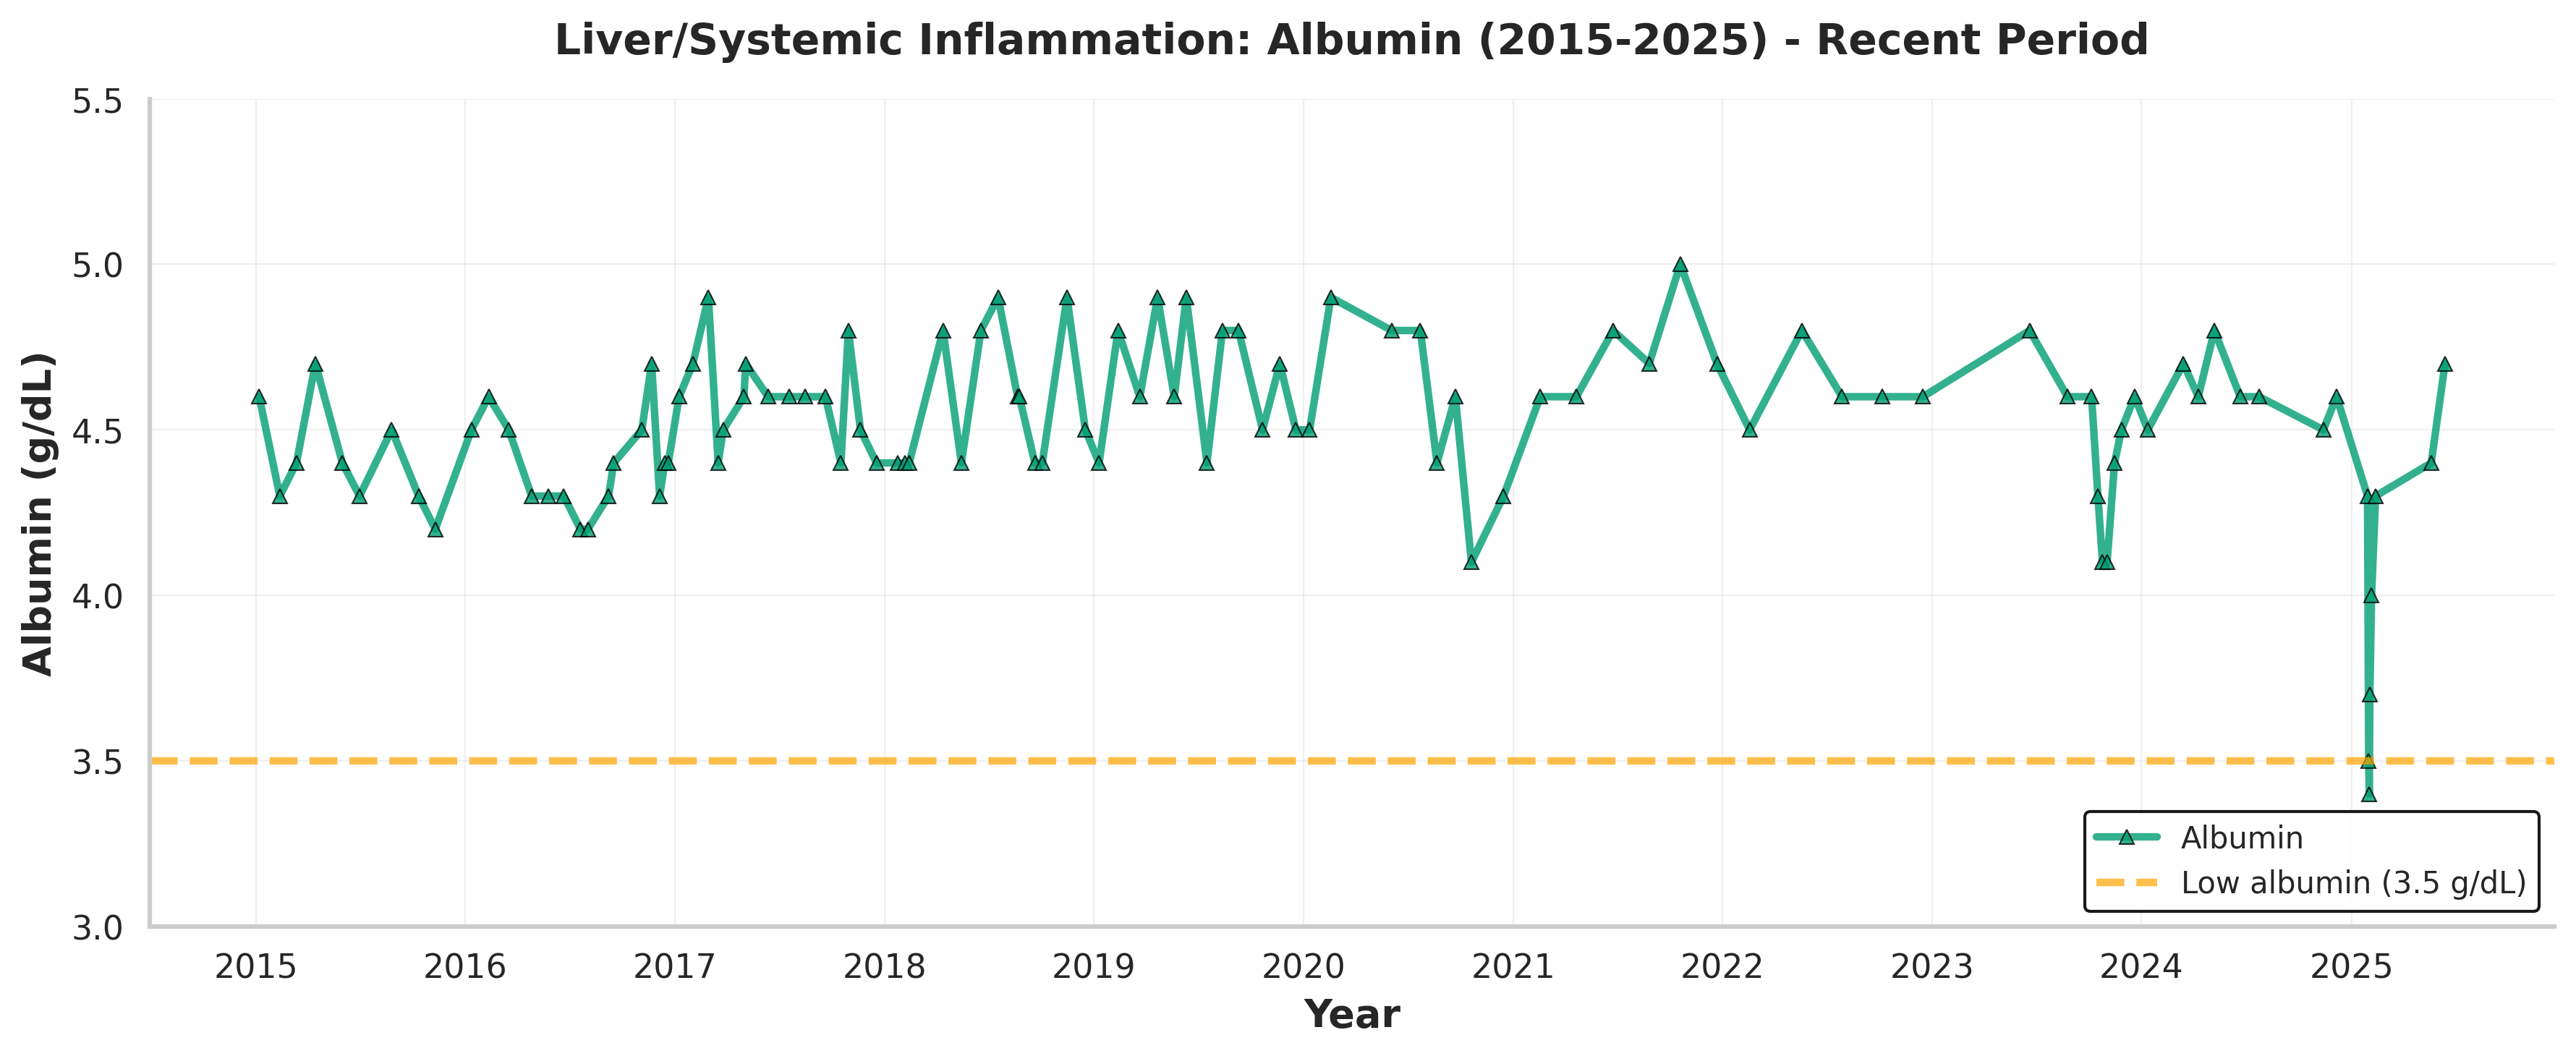

In [52]:


plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1.5, 'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(albumin['Date'], albumin['Value'],
       color='#009E73', linewidth=2, marker='^',
       markersize=4, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='Albumin')

ax.axhline(3.5, color='orange', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Low albumin (3.5 g/dL) - Systemic inflammation')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Albumin (g/dL)', fontsize=13, fontweight='bold')
ax.set_title('Liver/Systemic Inflammation: Albumin (1996-2025) - Complete Timeline',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([3.0, 5.5])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(3))

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='lower right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(0.02, 0.05, 'Note: Albumin decreases during inflammation (it is an inverse marker)',
       transform=ax.transAxes, fontsize=9, style='italic',
       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('Fig3A_Albumin_Full.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig3A_Albumin_Full.png")
plt.show()

# recent

recent_start = pd.to_datetime('2015-01-01')
alb_recent = albumin[albumin['Date'] >= recent_start]

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(alb_recent['Date'], alb_recent['Value'],
       color='#009E73', linewidth=2.5, marker='^',
       markersize=5, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='Albumin')

ax.axhline(3.5, color='orange', linestyle='--', linewidth=2.5,
          alpha=0.7, label='Low albumin (3.5 g/dL)')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Albumin (g/dL)', fontsize=13, fontweight='bold')
ax.set_title('Liver/Systemic Inflammation: Albumin (2015-2025) - Recent Period',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([3.0, 5.5])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='lower right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig3B_Albumin_Recent.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig3B_Albumin_Recent.png")
plt.show()

 Saved: Fig4A_Ferritin_Full.png


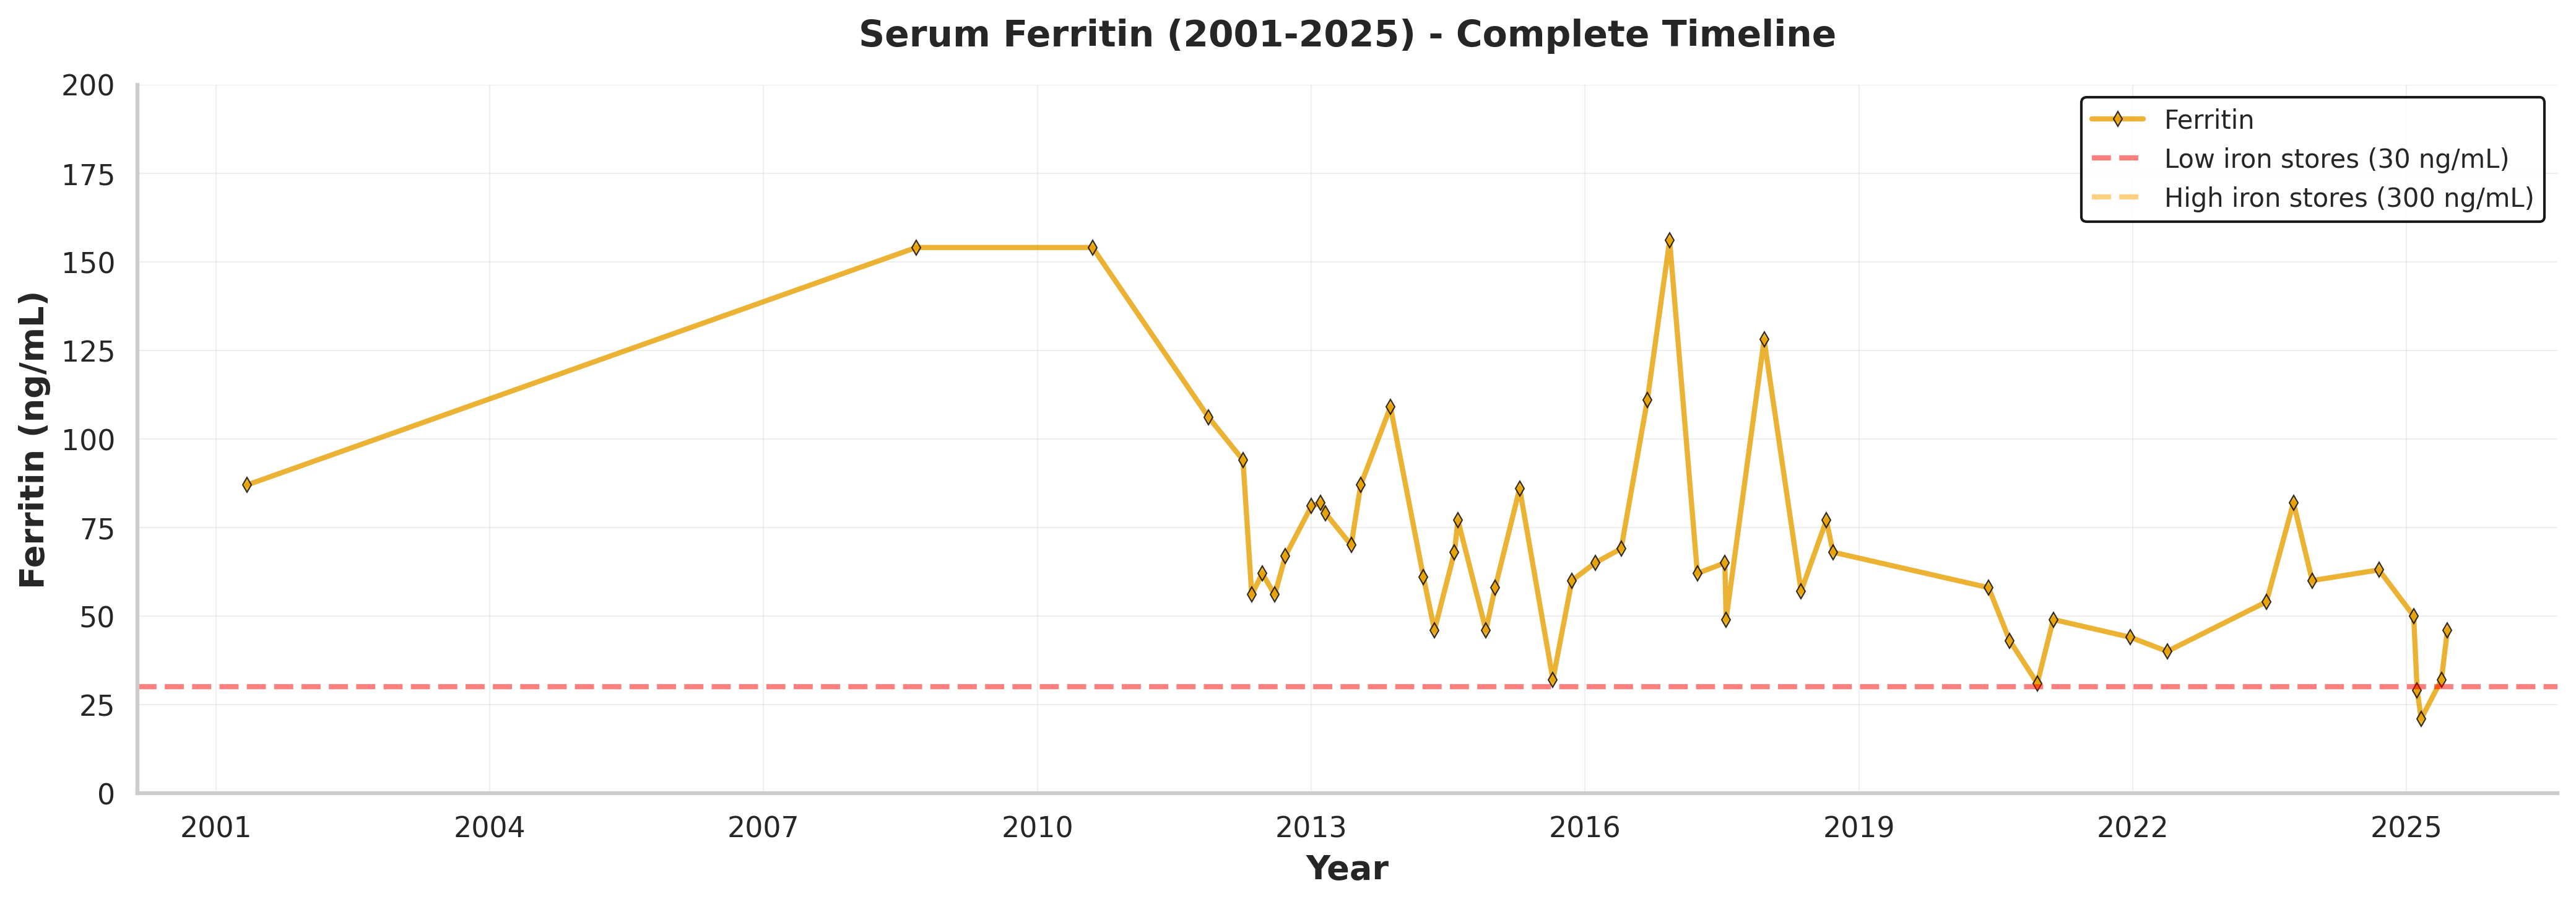

 Saved: Fig4B_Ferritin_Recent.png


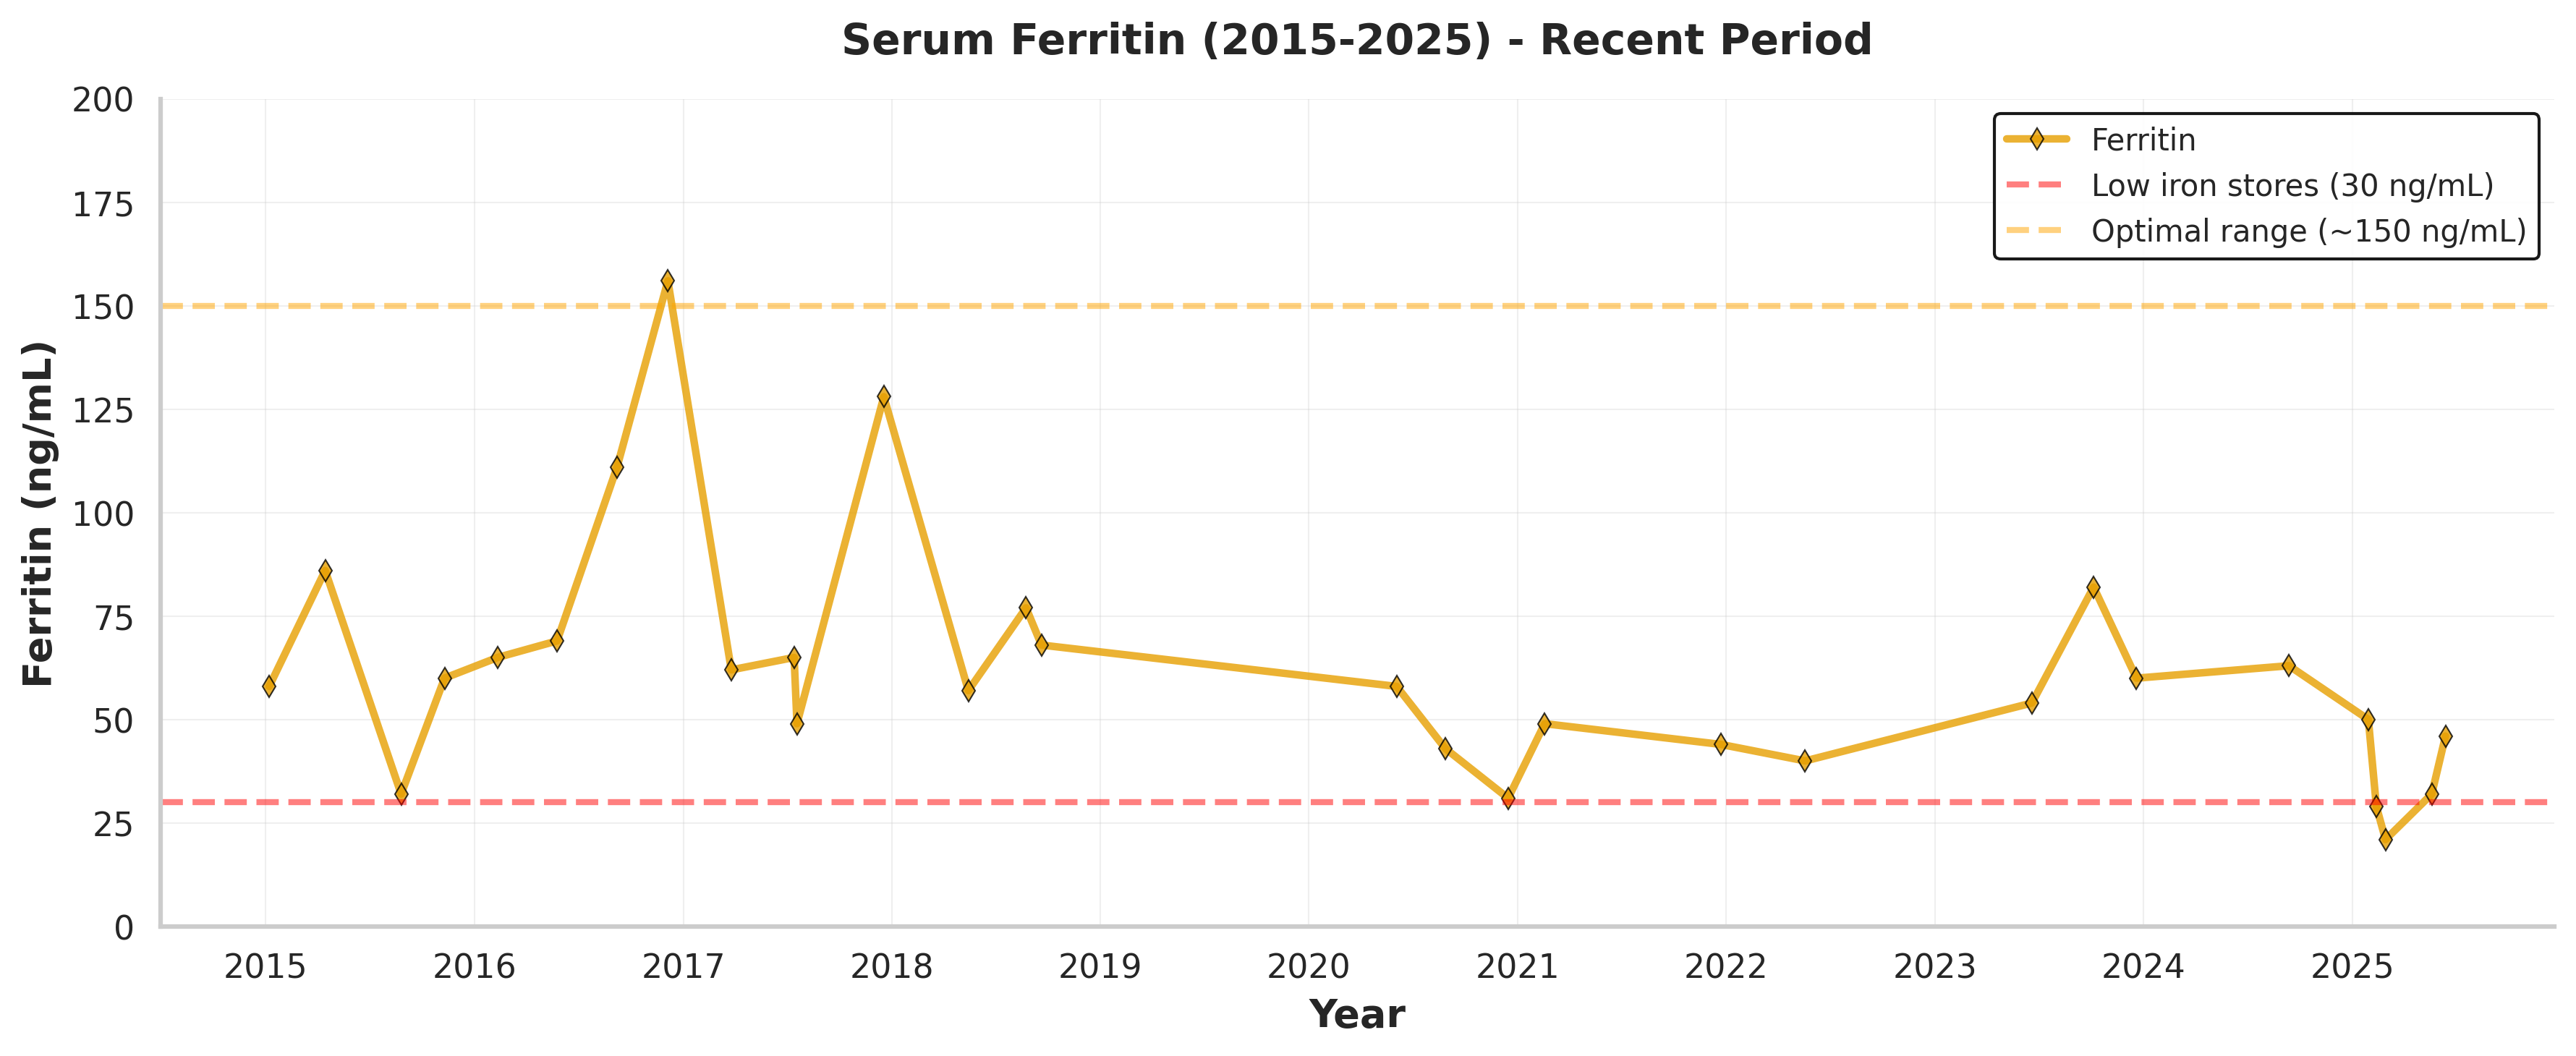

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1.5,'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(ferritin['Date'], ferritin['Value'],
       color='#E69F00', linewidth=2, marker='d',
       markersize=4, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='Ferritin')

ax.axhline(30, color='red', linestyle='--', linewidth=2,
          alpha=0.5, label='Low iron stores (30 ng/mL)')
ax.axhline(300, color='orange', linestyle='--', linewidth=2,
          alpha=0.5, label='High iron stores (300 ng/mL)')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Ferritin (ng/mL)', fontsize=13, fontweight='bold')
ax.set_title('Serum Ferritin (2001-2025) - Complete Timeline',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([0, 200])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(3))

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig4A_Ferritin_Full.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig4A_Ferritin_Full.png")
plt.show()

# recent

recent_start = pd.to_datetime('2015-01-01')
ferr_recent = ferritin[ferritin['Date'] >= recent_start]

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(ferr_recent['Date'], ferr_recent['Value'],
       color='#E69F00', linewidth=2.5, marker='d',
       markersize=5, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='Ferritin')

ax.axhline(30, color='red', linestyle='--', linewidth=2,
          alpha=0.5, label='Low iron stores (30 ng/mL)')
ax.axhline(150, color='orange', linestyle='--', linewidth=2,
          alpha=0.5, label='Optimal range (~150 ng/mL)')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Ferritin (ng/mL)', fontsize=13, fontweight='bold')
ax.set_title('Serum Ferritin (2015-2025) - Recent Period',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([0, 200])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig4B_Ferritin_Recent.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig4B_Ferritin_Recent.png")
plt.show()

 Saved: Fig5A_WBC_Full.png


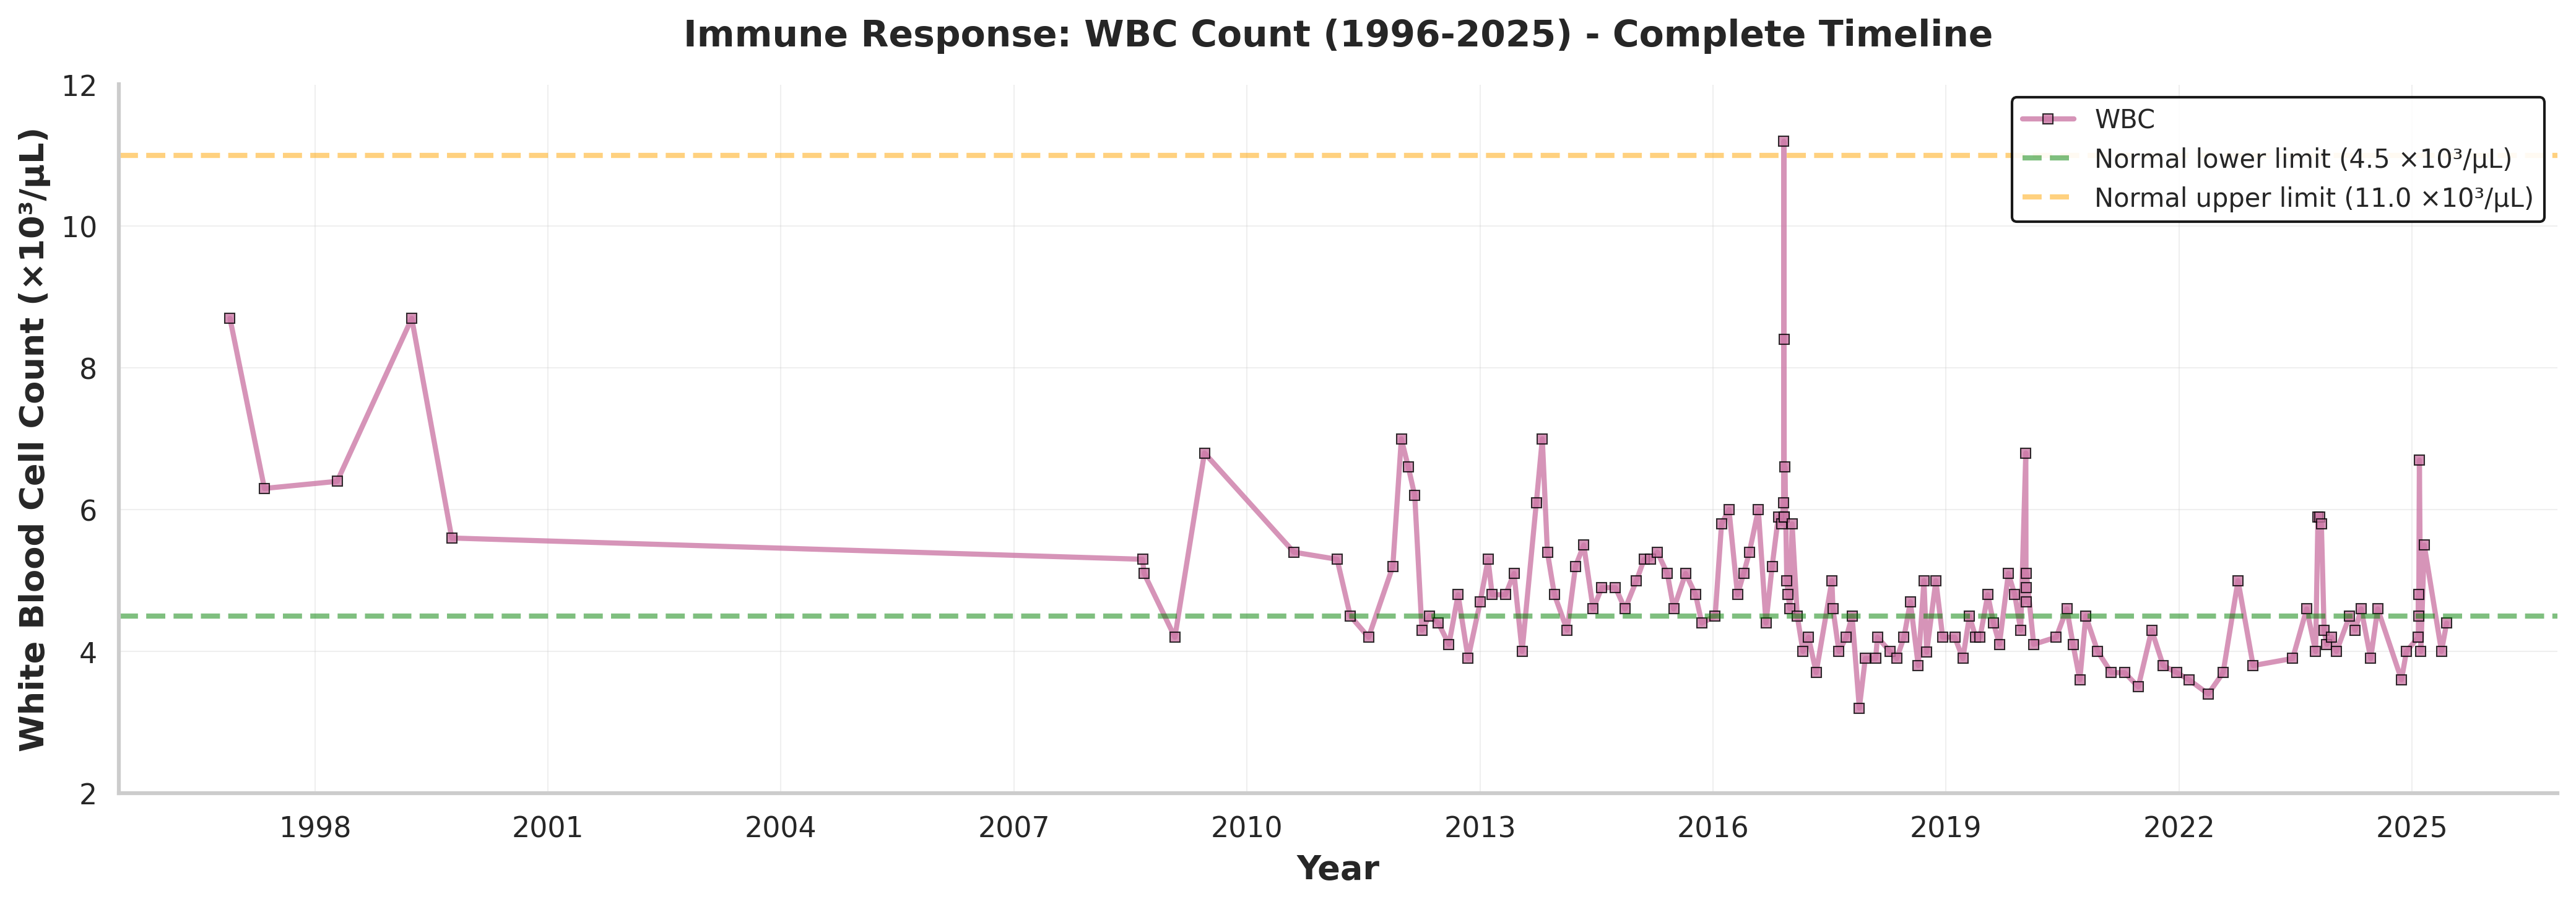

 Saved: Fig5B_WBC_Recent.png


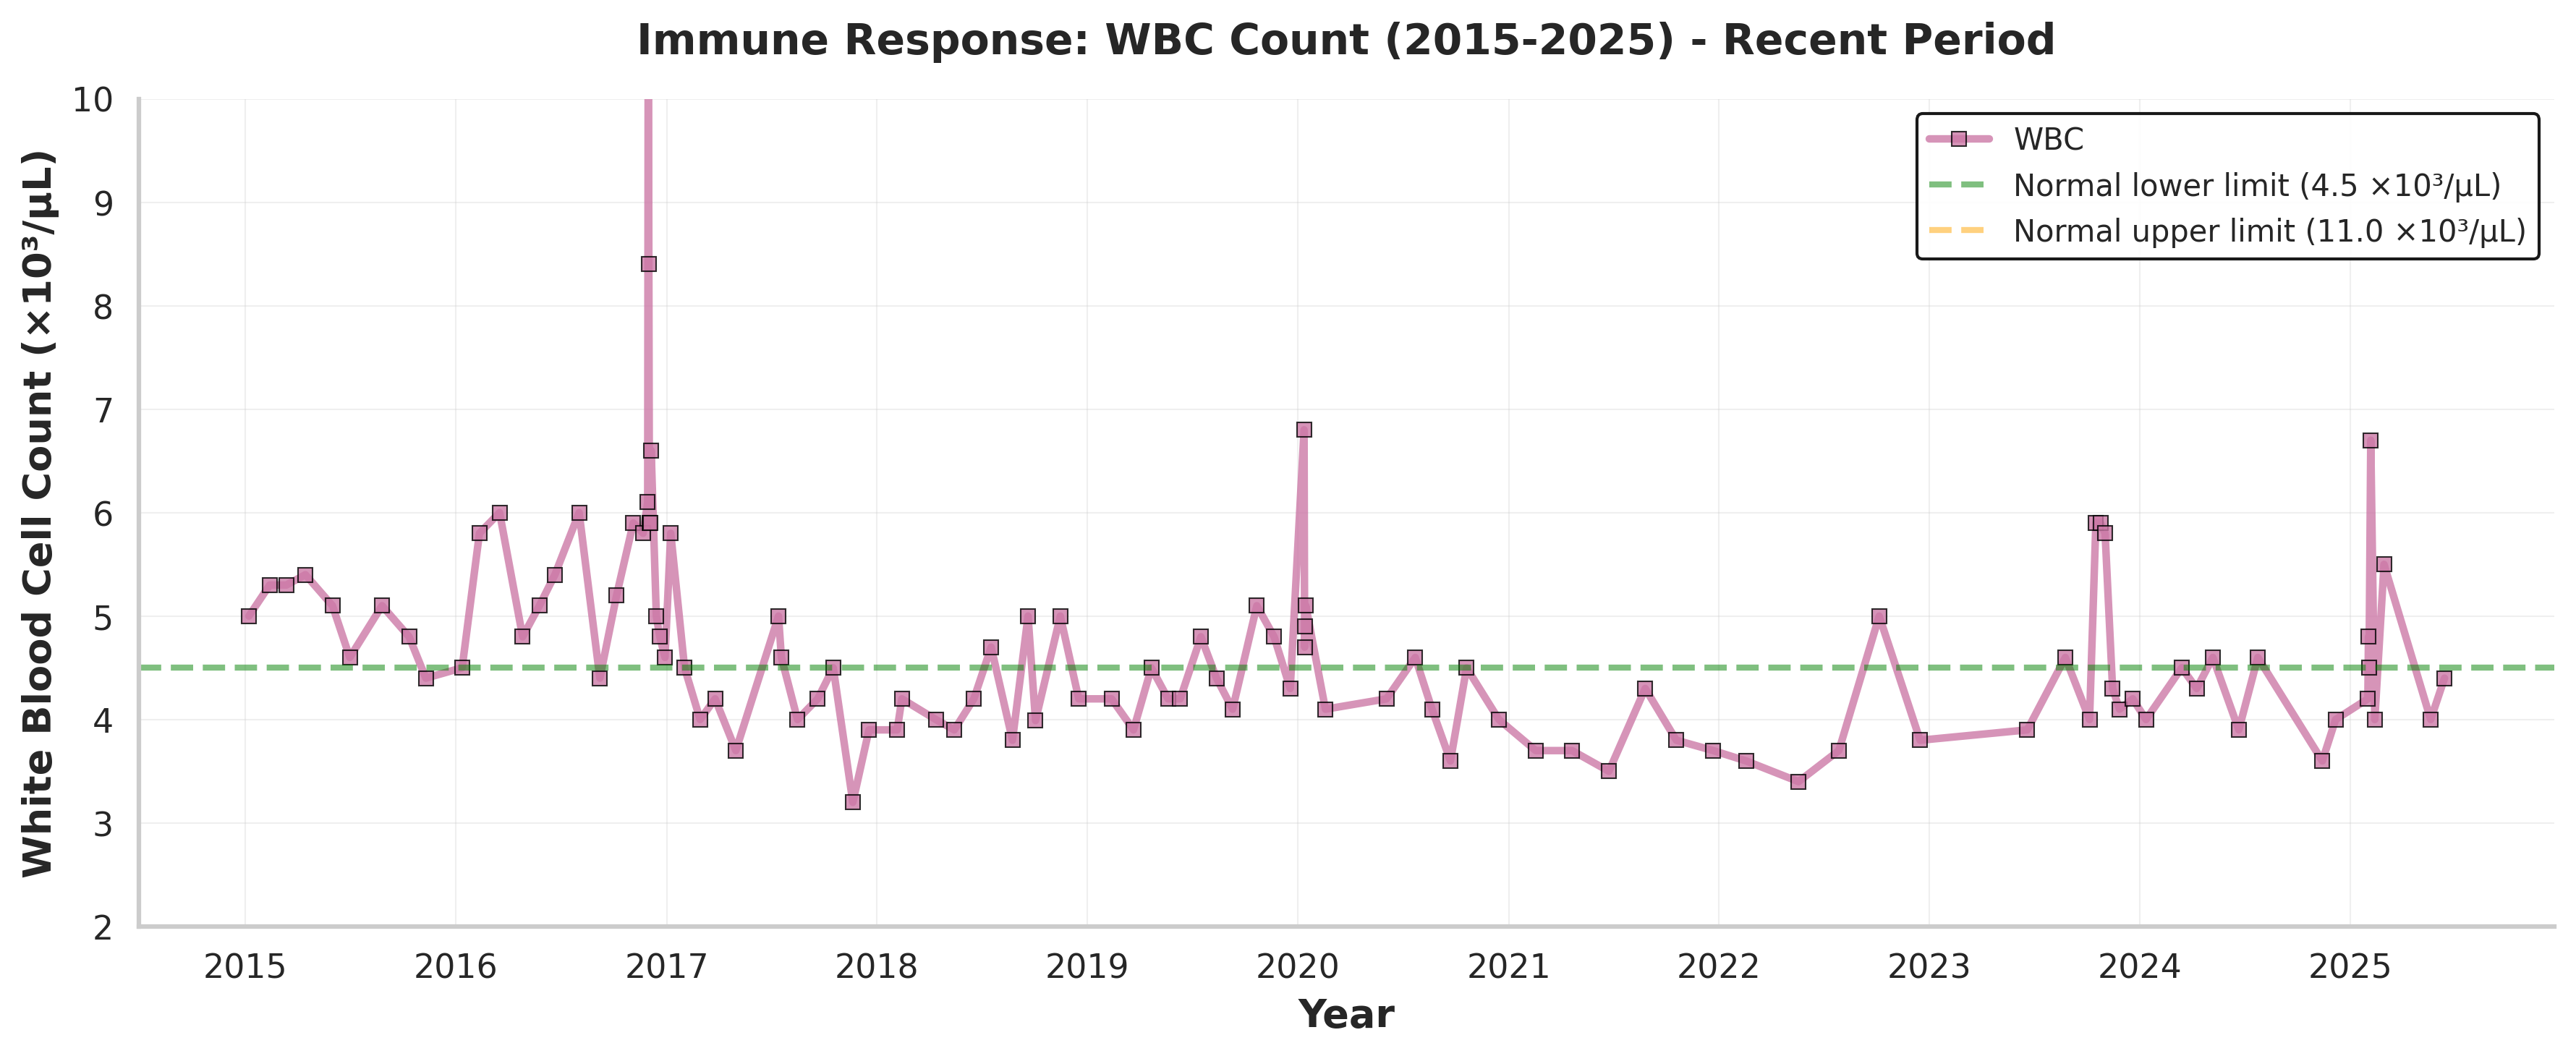

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1.5, 'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(wbc['Date'], wbc['Value'],
       color='#CC79A7', linewidth=2, marker='s',
       markersize=4, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='WBC')

ax.axhline(4.5, color='green', linestyle='--', linewidth=2,
          alpha=0.5, label='Normal lower limit (4.5 ×10³/μL)')
ax.axhline(11.0, color='orange', linestyle='--', linewidth=2,
          alpha=0.5, label='Normal upper limit (11.0 ×10³/μL)')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('White Blood Cell Count (×10³/μL)', fontsize=13, fontweight='bold')
ax.set_title('Immune Response: WBC Count (1996-2025) - Complete Timeline',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([2, 12])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(3))

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig5A_WBC_Full.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig5A_WBC_Full.png")
plt.show()

# recent

recent_start = pd.to_datetime('2015-01-01')
wbc_recent = wbc[wbc['Date'] >= recent_start]

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(wbc_recent['Date'], wbc_recent['Value'],
       color='#CC79A7', linewidth=2.5, marker='s',
       markersize=5, markeredgewidth=0.5, markeredgecolor='black',
       alpha=0.8, label='WBC')

ax.axhline(4.5, color='green', linestyle='--', linewidth=2,
          alpha=0.5, label='Normal lower limit (4.5 ×10³/μL)')
ax.axhline(11.0, color='orange', linestyle='--', linewidth=2,
          alpha=0.5, label='Normal upper limit (11.0 ×10³/μL)')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('White Blood Cell Count (×10³/μL)', fontsize=13, fontweight='bold')
ax.set_title('Immune Response: WBC Count (2015-2025) - Recent Period',
            fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([2, 10])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

ax.grid(True, alpha=0.3, linewidth=0.5)
ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig5B_WBC_Recent.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: Fig5B_WBC_Recent.png")
plt.show()

In [60]:
print(" CROSS-CORRELATION ANALYSIS")

print("Testing: Does Calprotectin predict future Hemoglobin changes?")

calp_ts = calprotectin[['Date', 'Value']].copy()
calp_ts.columns = ['Date', 'Calprotectin']
calp_ts = calp_ts.sort_values('Date').set_index('Date')

hgb_ts = hemoglobin[['Date', 'Value']].copy()
hgb_ts.columns = ['Date', 'Hemoglobin']
hgb_ts = hgb_ts.sort_values('Date').set_index('Date')

print(f"\nCalprotectin: {len(calp_ts)} measurements")
print(f"  Range: {calp_ts.index.min().date()} to {calp_ts.index.max().date()}")
print(f"  Mean ± SD: {calp_ts['Calprotectin'].mean():.2f} ± {calp_ts['Calprotectin'].std():.2f}")

print(f"\nHemoglobin: {len(hgb_ts)} measurements")
print(f"  Range: {hgb_ts.index.min().date()} to {hgb_ts.index.max().date()}")
print(f"  Mean ± SD: {hgb_ts['Hemoglobin'].mean():.2f} ± {hgb_ts['Hemoglobin'].std():.2f}")


merged = calp_ts.join(hgb_ts, how='outer').sort_index()
print(f"\nOverlapping period: {merged.index.min().date()} to {merged.index.max().date()}")
print(f"Total weeks in range: {(merged.index.max() - merged.index.min()).days / 7:.0f}")

 CROSS-CORRELATION ANALYSIS
Testing: Does Calprotectin predict future Hemoglobin changes?

Calprotectin: 223 measurements
  Range: 2011-11-18 to 2025-06-13
  Mean ± SD: 97.66 ± 235.36

Hemoglobin: 149 measurements
  Range: 1996-11-27 to 2025-06-13
  Mean ± SD: 14.74 ± 1.22

Overlapping period: 1996-11-27 to 2025-06-13
Total weeks in range: 1489


In [61]:
print("INTERPOLATION TO WEEKLY INTERVALS")

print("\nInterpolation necessary because of the following:")
print("  • Measurements are irregular (not on same dates)")
print("  • Cross-correlation requires regular time intervals")
print("  • Weekly intervals balance resolution with smoothing")

INTERPOLATION TO WEEKLY INTERVALS

Interpolation necessary because of the following:
  • Measurements are irregular (not on same dates)
  • Cross-correlation requires regular time intervals
  • Weekly intervals balance resolution with smoothing


In [63]:
date_range = pd.date_range(
    start=merged.index.min(),
    end=merged.index.max(),
    freq='W'
)
print(f"\nCreating regular weekly grid: {len(date_range)} weeks")

def interpolate_to_weekly(series, target_dates):
    """Linear interpolation to regular weekly intervals"""
    clean = series.dropna()

    if len(clean) < 2:
        print(f"  WARNING: Only {len(clean)} data points - cannot interpolate")
        return pd.Series(index=target_dates, dtype=float)

    # Convert to days since start
    start = clean.index.min()
    days_orig = (clean.index - start).days.values
    values = clean.values

    # Interpolate
    f = interp1d(days_orig, values, kind='linear',
                 fill_value='extrapolate', bounds_error=False)

    days_target = (target_dates - start).days.values
    interpolated = f(days_target)

    return pd.Series(interpolated, index=target_dates)

# Interpolate both markers
print("\nInterpolating Calprotectin")
calp_interp = interpolate_to_weekly(merged['Calprotectin'], date_range)
print(f"   {len(calp_interp)} weekly values")
print(f"  Range: {calp_interp.min():.2f} - {calp_interp.max():.2f}")

print("\nInterpolating Hemoglobin")
hgb_interp = interpolate_to_weekly(merged['Hemoglobin'], date_range)
print(f"   {len(hgb_interp)} weekly values")
print(f"  Range: {hgb_interp.min():.2f} - {hgb_interp.max():.2f}")



Creating regular weekly grid: 1489 weeks

Interpolating Calprotectin
   1489 weekly values
  Range: -220039.62 - 2378.72

Interpolating Hemoglobin
   1489 weekly values
  Range: 9.90 - 16.85


In [94]:
import scipy.stats as stats
import pandas as pd

print("LAGGED CROSS-CORRELATION ANALYSIS (ON FIRST DIFFERENCE)")
print("\nHypothesis Testing:")
print("  H₀: A change in Calprotectin does NOT predict a future change in Hemoglobin")
print("  H₁: A change in Calprotectin precedes a change in Hemoglobin by X weeks")
print("  Expected: NEGATIVE correlation")
print()

calp_series = calp_interp.diff().dropna()
hgb_series = hgb_interp.diff().dropna()

MAX_LAG_WEEKS = 16
results = []
print(f"{'Lag (weeks)':<12} {'N':<8} {'r':<10} {'p-value':<12} {'Sig':<6} {'Interpretation'}")
print("-" * 75)

for lag in range(0, MAX_LAG_WEEKS + 1):
    # Create lagged series
    if lag == 0:
        calp_lag = calp_series
        hgb = hgb_series
    else:
        calp_lag = calp_series.iloc[:-lag]
        hgb = hgb_series.iloc[lag:]

    # Align indices
    common_idx = calp_lag.index.intersection(hgb.index)
    calp_aligned = calp_lag[common_idx]
    hgb_aligned = hgb[common_idx]

    # Remove NaN
    valid_mask = ~(calp_aligned.isna() | hgb_aligned.isna())
    calp_valid = calp_aligned[valid_mask]
    hgb_valid = hgb_aligned[valid_mask]

    n = len(calp_valid)

    if n >= 10:
        r, p = stats.pearsonr(calp_valid, hgb_valid)

        if p < 0.001:
            sig = '***'
            p_str = '< 0.001'
        elif p < 0.01:
            sig = '**'
            p_str = f'{p:.3f}'
        elif p < 0.05:
            sig = '*'
            p_str = f'{p:.3f}'
        else:
            sig = ''
            p_str = f'{p:.3f}'

        # Interpretation
        if abs(r) < 0.1:
            interp = 'No relationship'
        elif r < 0:
            interp = 'Inverse (calp change predicts opposite hgb change)'
        else:
            interp = 'Direct (calp change predicts same hgb change)'

        print(f"{lag:<12} {n:<8} {r:<10.3f} {p_str:<12} {sig:<6} {interp}")

        results.append({
            'lag': lag,
            'n': n,
            'r': r,
            'p': p,
            'significant': p < 0.05
        })
    else:
        print(f"{lag:<12} {n:<8} {'N/A':<10} {'N/A':<12} {'':<6} Insufficient data")

df_results = pd.DataFrame(results)

if len(df_results) > 0:
    sig_results = df_results[df_results['significant']]

    if len(sig_results) > 0:
        print("\n  SIGNIFICANT TEMPORAL RELATIONSHIPS DETECTED")

        # Most negative correlation (strongest inverse)
        strongest = sig_results.loc[sig_results['r'].idxmin()]

        print(f"\n  STRONGEST INVERSE RELATIONSHIP:")
        print(f"   Lag: {int(strongest['lag'])} weeks")
        print(f"   Correlation: r = {strongest['r']:.3f}")
        print(f"   P-value: p = {strongest['p']:.6f}")
        print(f"   Sample size: n = {int(strongest['n'])}")
        print(f"\n   INTERPRETATION:")
        print(f"    A *change* in Calprotectin levels predicts a *change* in hemoglobin levels {int(strongest['lag'])} weeks later")

        print(f"\n ALL SIGNIFICANT LAGS (p < 0.05):")
        for _, row in sig_results.iterrows():
            print(f"   Lag {int(row['lag'])} weeks: r = {row['r']:.3f}, p = {row['p']:.6f}")
    else:
        print("\n  NO SIGNIFICANT RELATIONSHIPS at p < 0.05")
        print("    The week-to-week changes are not correlated.")
else:
    print("\n  INSUFFICIENT DATA for correlation analysis")

LAGGED CROSS-CORRELATION ANALYSIS (ON FIRST DIFFERENCE)

Hypothesis Testing:
  H₀: A change in Calprotectin does NOT predict a future change in Hemoglobin
  H₁: A change in Calprotectin precedes a change in Hemoglobin by X weeks
  Expected: NEGATIVE correlation

Lag (weeks)  N        r          p-value      Sig    Interpretation
---------------------------------------------------------------------------
0            1488     -0.081     0.002        **     No relationship
1            1486     -0.080     0.002        **     No relationship
2            1484     -0.078     0.002        **     No relationship
3            1482     -0.077     0.003        **     No relationship
4            1480     -0.076     0.003        **     No relationship
5            1478     -0.075     0.004        **     No relationship
6            1476     -0.074     0.005        **     No relationship
7            1474     -0.073     0.005        **     No relationship
8            1472     -0.071     0.006   

In [93]:
import pandas as pd
import numpy as np
from scipy import stats

print("--- GROUP COMPARISON (T-TEST) ANALYSIS ---")
print("Hypothesis: Patients with high gut inflammation (high Calprotectin) have lower Hemoglobin.\n")


calp_data = calprotectin.rename(columns={'Value': 'Calprotectin_Value'})
hgb_data = hemoglobin.rename(columns={'Value': 'Hemoglobin_Value'})


df_merged = pd.merge_asof(
    hgb_data.sort_values('Date'),
    calp_data.sort_values('Date'),
    on='Date',
    direction='backward',
    tolerance=pd.Timedelta(days=90) #for a "relevant" test
)


df_merged = df_merged.dropna(subset=['Calprotectin_Value', 'Hemoglobin_Value'])

print(f"Found {len(df_merged)} Hemoglobin measurements with a relevant Calprotectin test (within 90 days prior).")

if len(df_merged) < 20:
    print(" Warning: Very few matching data points. Results may not be reliable.")

else:
    #  T-Test
    INFLAMMATION_THRESHOLD = 150
    print(f"\nUsing Calprotectin threshold of {INFLAMMATION_THRESHOLD} μg/g")

    high_inflammation_hgb = df_merged[df_merged['Calprotectin_Value'] > INFLAMMATION_THRESHOLD]['Hemoglobin_Value']
    low_inflammation_hgb = df_merged[df_merged['Calprotectin_Value'] <= INFLAMMATION_THRESHOLD]['Hemoglobin_Value']

    print(f"  'High Inflammation' group (Calp > {INFLAMMATION_THRESHOLD}): n = {len(high_inflammation_hgb)}")
    print(f"  'Low Inflammation' group (Calp <= {INFLAMMATION_THRESHOLD}): n = {len(low_inflammation_hgb)}")

    if len(high_inflammation_hgb) < 2 or len(low_inflammation_hgb) < 2:
        print("\n Error: One or both groups have insufficient data to perform a t-test.")

    else:

        print(f"\n  Mean Hemoglobin (High Inflammation): {high_inflammation_hgb.mean():.2f} g/dL")
        print(f"  Mean Hemoglobin (Low Inflammation): {low_inflammation_hgb.mean():.2f} g/dL")

        t_stat, p_value = stats.ttest_ind(high_inflammation_hgb, low_inflammation_hgb, equal_var=False, nan_policy='omit')

        print("\n--- T-Test Results ---")
        print(f"  T-statistic: {t_stat:.4f}")
        print(f"  P-value: {p_value:.6f}")

        print("\n--- Interpretation ---")
        if p_value < 0.05:
            print(" Statistically Significant (p < 0.05)")
            if high_inflammation_hgb.mean() < low_inflammation_hgb.mean():
                print("  FINDING: Patients in the 'High Inflammation' group have a *significantly lower* mean Hemoglobin.")
                print("  This robustly supports the hypothesis from the literature.")
            else:
                print("  FINDING: The groups are different, but the 'High Inflammation' group has *higher* Hemoglobin.")
                print("  This contradicts the initial hypothesis.")
        else:
            print(" Not Statistically Significant (p >= 0.05)")
            print("  FINDING: There is no statistically significant difference in mean Hemoglobin between the two groups.")
            print("  This analysis does not support the hypothesis.")

--- GROUP COMPARISON (T-TEST) ANALYSIS ---
Hypothesis: Patients with high gut inflammation (high Calprotectin) have lower Hemoglobin.

Found 137 Hemoglobin measurements with a relevant Calprotectin test (within 90 days prior).

Using Calprotectin threshold of 150 μg/g
  'High Inflammation' group (Calp > 150): n = 39
  'Low Inflammation' group (Calp <= 150): n = 98

  Mean Hemoglobin (High Inflammation): 14.41 g/dL
  Mean Hemoglobin (Low Inflammation): 14.85 g/dL

--- T-Test Results ---
  T-statistic: -1.4647
  P-value: 0.149583

--- Interpretation ---
 Not Statistically Significant (p >= 0.05)
  FINDING: There is no statistically significant difference in mean Hemoglobin between the two groups.
  This analysis does not support the hypothesis.


In [92]:
import pandas as pd
import numpy as np
from scipy import stats

print("--- GROUP COMPARISON (T-TEST) ANALYSIS: CALPROTECTIN vs. FERRITIN ---")
print("Hypothesis: Patients with high gut inflammation (high Calprotectin) have lower Ferritin (iron stores).\n")


try:
    ferritin = df_long[df_long['Biomarker'] == 'Ferritin'].copy()
    ferritin['Date'] = pd.to_datetime(ferritin['Date'])
    ferritin = ferritin.dropna(subset=['Value'])
except NameError:
    print(" ERROR: 'df_long' or the 'Ferritin' biomarker was not found.")
    raise

calp_data = calprotectin.rename(columns={'Value': 'Calprotectin_Value'})
ferritin_data = ferritin.rename(columns={'Value': 'Ferritin_Value'})

df_merged_ferritin = pd.merge_asof(
    ferritin_data.sort_values('Date'),
    calp_data.sort_values('Date'),
    on='Date',
    direction='backward',
    tolerance=pd.Timedelta(days=90)
)

df_merged_ferritin = df_merged_ferritin.dropna(subset=['Calprotectin_Value', 'Ferritin_Value'])

print(f"Found {len(df_merged_ferritin)} Ferritin measurements with a relevant Calprotectin test (within 90 days prior).")

if len(df_merged_ferritin) < 20:
    print(" Warning: Very few matching data points. Results may not be reliable.")

else:

    INFLAMMATION_THRESHOLD = 150 # μg/g
    print(f"\nUsing Calprotectin threshold of {INFLAMMATION_THRESHOLD} μg/g")

    high_inflammation_ferritin = df_merged_ferritin[df_merged_ferritin['Calprotectin_Value'] > INFLAMMATION_THRESHOLD]['Ferritin_Value']
    low_inflammation_ferritin = df_merged_ferritin[df_merged_ferritin['Calprotectin_Value'] <= INFLAMMATION_THRESHOLD]['Ferritin_Value']

    print(f"  'High Inflammation' group (Calp > {INFLAMMATION_THRESHOLD}): n = {len(high_inflammation_ferritin)}")
    print(f"  'Low Inflammation' group (Calp <= {INFLAMMATION_THRESHOLD}): n = {len(low_inflammation_ferritin)}")

    if len(high_inflammation_ferritin) < 2 or len(low_inflammation_ferritin) < 2:
        print("\n Error: One or both groups have insufficient data to perform a t-test.")

    else:

        print(f"\n  Mean Ferritin (High Inflammation): {high_inflammation_ferritin.mean():.2f} ng/mL")
        print(f"  Mean Ferritin (Low Inflammation): {low_inflammation_ferritin.mean():.2f} ng/mL")

        t_stat, p_value = stats.ttest_ind(high_inflammation_ferritin, low_inflammation_ferritin, equal_var=False, nan_policy='omit')

        print("\n--- T-Test Results ---")
        print(f"  T-statistic: {t_stat:.4f}")
        print(f"  P-value: {p_value:.6f}")


        print("\n--- Interpretation ---")
        if p_value < 0.05:
            print(" Statistically Significant (p < 0.05)")
            if high_inflammation_ferritin.mean() < low_inflammation_ferritin.mean():
                print("  FINDING: Patients in the 'High Inflammation' group have *significantly lower* mean Ferritin.")
                print("  This robustly supports the malabsorption hypothesis.")
            else:
                print("  FINDING: The groups are different, but the 'High Inflammation' group has *higher* Ferritin.")
                print("  (This could be due to Ferritin also being an acute-phase reactant, i.e., inflammation itself raises it).")
        else:
            print(" Not Statistically Significant (p >= 0.05)")
            print("  FINDING: There is no statistically significant difference in mean Ferritin between the two groups.")

--- GROUP COMPARISON (T-TEST) ANALYSIS: CALPROTECTIN vs. FERRITIN ---
Hypothesis: Patients with high gut inflammation (high Calprotectin) have lower Ferritin (iron stores).

Found 47 Ferritin measurements with a relevant Calprotectin test (within 90 days prior).

Using Calprotectin threshold of 150 μg/g
  'High Inflammation' group (Calp > 150): n = 17
  'Low Inflammation' group (Calp <= 150): n = 30

  Mean Ferritin (High Inflammation): 72.35 ng/mL
  Mean Ferritin (Low Inflammation): 62.07 ng/mL

--- T-Test Results ---
  T-statistic: 1.4466
  P-value: 0.155211

--- Interpretation ---
 Not Statistically Significant (p >= 0.05)
  FINDING: There is no statistically significant difference in mean Ferritin between the two groups.


In [91]:
import pandas as pd
import numpy as np
from scipy import stats

print("--- GROUP COMPARISON (T-TEST) ANALYSIS: CALPROTECTIN vs. CRP ---")
print("Hypothesis: Patients with high gut inflammation (high Calprotectin) have higher systemic inflammation (CRP).\n")


try:
    crp = df_long[df_long['Biomarker'] == 'C-Reactive Protein'].copy()
    crp['Date'] = pd.to_datetime(crp['Date'])
    crp = crp.dropna(subset=['Value'])
except NameError:
    print(" ERROR: 'df_long' or the 'C-Reactive Protein' biomarker was not found.")
    raise

calp_data = calprotectin.rename(columns={'Value': 'Calprotectin_Value'})
crp_data = crp.rename(columns={'Value': 'CRP_Value'})

df_merged_crp = pd.merge_asof(
    crp_data.sort_values('Date'),
    calp_data.sort_values('Date'),
    on='Date',
    direction='backward',
    tolerance=pd.Timedelta(days=90)
)

df_merged_crp = df_merged_crp.dropna(subset=['Calprotectin_Value', 'CRP_Value'])

print(f"Found {len(df_merged_crp)} CRP measurements with a relevant Calprotectin test (within 90 days prior).")

if len(df_merged_crp) < 20:
    print(" Warning: Very few matching data points. Results may not be reliable.")

else:
    #  T-Test
    INFLAMMATION_THRESHOLD = 150 # μg/g
    print(f"\nUsing Calprotectin threshold of {INFLAMMATION_THRESHOLD} μg/g")

    high_inflammation_crp = df_merged_crp[df_merged_crp['Calprotectin_Value'] > INFLAMMATION_THRESHOLD]['CRP_Value']
    low_inflammation_crp = df_merged_crp[df_merged_crp['Calprotectin_Value'] <= INFLAMMATION_THRESHOLD]['CRP_Value']

    print(f"  'High Inflammation' group (Calp > {INFLAMMATION_THRESHOLD}): n = {len(high_inflammation_crp)}")
    print(f"  'Low Inflammation' group (Calp <= {INFLAMMATION_THRESHOLD}): n = {len(low_inflammation_crp)}")

    if len(high_inflammation_crp) < 2 or len(low_inflammation_crp) < 2:
        print("\n Error: One or both groups have insufficient data to perform a t-test.")

    else:

        print(f"\n  Mean CRP (High Inflammation): {high_inflammation_crp.mean():.2f} mg/L")
        print(f"  Mean CRP (Low Inflammation): {low_inflammation_crp.mean():.2f} mg/L")

        t_stat, p_value = stats.ttest_ind(high_inflammation_crp, low_inflammation_crp, equal_var=False, nan_policy='omit')

        print("\n--- T-Test Results ---")
        print(f"  T-statistic: {t_stat:.4f}")
        print(f"  P-value: {p_value:.6f}")

        print("\n--- Interpretation ---")
        if p_value < 0.05:
            print("Statistically Significant (p < 0.05)")
            if high_inflammation_crp.mean() > low_inflammation_crp.mean():
                print("  FINDING: Patients in the 'High Inflammation' group have a *significantly higher* mean CRP.")
                print("  This robustly supports the hypothesis of gut inflammation driving systemic inflammation.")
            else:
                print("  FINDING: The groups are different, but the 'High Inflammation' group has *lower* CRP.")
        else:
            print(" Not Statistically Significant (p >= 0.05)")
            print("  FINDING: There is no statistically significant difference in mean CRP between the two groups.")


--- GROUP COMPARISON (T-TEST) ANALYSIS: CALPROTECTIN vs. CRP ---
Hypothesis: Patients with high gut inflammation (high Calprotectin) have higher systemic inflammation (CRP).

Found 0 CRP measurements with a relevant Calprotectin test (within 90 days prior).


In [90]:
import pandas as pd
import numpy as np
from scipy import stats

print("--- LAGGED CORRELATION ON 12-WEEK ROLLING TREND ---")
print("Hypothesis: A change in the *slow trend* of Calprotectin predicts a change in the *slow trend* of Hemoglobin.\n")

try:
    if 'calp_interp' not in locals() or 'hgb_interp' not in locals():
        raise NameError("calp_interp or hgb_interp not found")
except NameError:
    print(" ERROR: 'calp_interp' and 'hgb_interp' not found.")
    print("   Please re-run the cells in 'Biomarker_Relationship.ipynb' where they are created.")

    raise


WINDOW_WEEKS = 12
calp_trend = calp_interp.rolling(window=WINDOW_WEEKS).mean()
hgb_trend = hgb_interp.rolling(window=WINDOW_WEEKS).mean()


calp_series = calp_trend.diff().dropna()
hgb_series = hgb_trend.diff().dropna()

MAX_LAG_WEEKS = 16
results = []
print(f"{'Lag (weeks)':<12} {'N':<8} {'r':<10} {'p-value':<12} {'Sig':<6} {'Interpretation'}")
print("-" * 75)

for lag in range(0, MAX_LAG_WEEKS + 1):
    if lag == 0:
        calp_lag = calp_series
        hgb = hgb_series
    else:
        calp_lag = calp_series.iloc[:-lag]
        hgb = hgb_series.iloc[lag:]

    # Align indices
    common_idx = calp_lag.index.intersection(hgb.index)
    calp_aligned = calp_lag[common_idx]
    hgb_aligned = hgb[common_idx]

    # Remove NaN
    valid_mask = ~(calp_aligned.isna() | hgb_aligned.isna())
    calp_valid = calp_aligned[valid_mask]
    hgb_valid = hgb_aligned[valid_mask]

    n = len(calp_valid)

    if n >= 20:
        r, p = stats.pearsonr(calp_valid, hgb_valid)

        # p-value formatting
        if p < 0.001:
            sig = '***'
            p_str = '< 0.001'
        elif p < 0.01:
            sig = '**'
            p_str = f'{p:.3f}'
        elif p < 0.05:
            sig = '*'
            p_str = f'{p:.3f}'
        else:
            sig = ''
            p_str = f'{p:.3f}'

        # Interpretation
        if abs(r) < 0.1:
            interp = 'No relationship'
        elif r < 0:
            interp = 'Inverse (trend up -> trend down)'
        else:
            interp = 'Direct (trend up -> trend up)'

        print(f"{lag:<12} {n:<8} {r:<10.3f} {p_str:<12} {sig:<6} {interp}")

        results.append({
            'lag': lag,
            'n': n,
            'r': r,
            'p': p,
            'significant': p < 0.05
        })
    else:
        print(f"{lag:<12} {n:<8} {'N/A':<10} {'N/A':<12} {'':<6} Insufficient data")

df_results = pd.DataFrame(results)

if len(df_results) > 0:
    sig_results = df_results[df_results['significant']]

    if len(sig_results) > 0:
        print("\n  SIGNIFICANT TEMPORAL RELATIONSHIPS DETECTED")

        # Most negative correlation (strongest inverse)
        strongest = sig_results.loc[sig_results['r'].idxmin()]

        print(f"\n  STRONGEST INVERSE RELATIONSHIP:")
        print(f"   Lag: {int(strongest['lag'])} weeks")
        print(f"   Correlation: r = {strongest['r']:.3f}")
        print(f"   P-value: p = {strongest['p']:.6f}")
        print(f"   Sample size: n = {int(strongest['n'])}")
        print(f"\n   INTERPRETATION:")
        print(f"    An *increase in the 3-month Calprotectin trend* predicts a *decrease in the 3-month Hemoglobin trend* {int(strongest['lag'])} weeks later.")
    else:
        print("\n  NO SIGNIFICANT RELATIONSHIPS at p < 0.05")
        print("    Even when looking at slow-moving trends, no predictive link was found.")
else:
    print("\n  INSUFFICIENT DATA for trend analysis")

--- LAGGED CORRELATION ON 12-WEEK ROLLING TREND ---
Hypothesis: A change in the *slow trend* of Calprotectin predicts a change in the *slow trend* of Hemoglobin.

Lag (weeks)  N        r          p-value      Sig    Interpretation
---------------------------------------------------------------------------
0            1477     -0.016     0.549               No relationship
1            1475     -0.011     0.661               No relationship
2            1473     -0.007     0.780               No relationship
3            1471     -0.003     0.904               No relationship
4            1469     0.001      0.970               No relationship
5            1467     0.005      0.841               No relationship
6            1465     0.011      0.669               No relationship
7            1463     0.019      0.463               No relationship
8            1461     0.020      0.446               No relationship
9            1459     0.020      0.450               No relationship
10 

In [ ]:
'PIVOTING TO A NEW HYPOTHESIS AND CHECKING BLOOD BIOMARKER VS BLOOD BIOMARKER'
''

In [96]:
import pandas as pd
import numpy as np
from scipy import stats

print("SENSITIVITY ANALYSIS (ALBUMIN vs. HEMOGLOBIN) ")
print(" New Hypothesis: Albumin is correlated with Hemoglobin.\n")

try:

    file_path = 'LS Biomarkers Timeseries.csv'
    df_wide = pd.read_csv(file_path, low_memory=False)


    df_wide = df_wide.rename(columns={df_wide.columns[0]: 'Biomarker'})

    metadata_cols = ['Biomarker']
    date_cols = []


    for col in df_wide.columns[1:]:

        if pd.to_datetime(col, errors='coerce') is not pd.NaT:
            date_cols.append(col)
        else:

            metadata_cols.append(col)

    print(f"Identified {len(metadata_cols)} metadata columns: {metadata_cols}")
    print(f"Identified {len(date_cols)} date columns.")

    df_long = df_wide.melt(id_vars=metadata_cols, value_vars=date_cols,
                           var_name='Date', value_name='Value')


    df_long['Date'] = pd.to_datetime(df_long['Date'])
    df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')
    df_long = df_long.dropna(subset=['Value', 'Date'])


    hemoglobin = df_long[df_long['Biomarker'] == 'HGB-'].copy()
    hemoglobin = hemoglobin.dropna(subset=['Value'])
    print(f"Created 'hemoglobin' (HGB-) DataFrame. n={len(hemoglobin)}")

    albumin = df_long[df_long['Biomarker'] == 'Albumin'].copy()
    albumin = albumin.dropna(subset=['Value'])
    print(f"Created 'albumin' DataFrame. n={len(albumin)}")

    if albumin.empty or hemoglobin.empty:
        print("WARNING: One of the required DataFrames is empty. Analysis might fail.")
        raise ValueError("Albumin or Hemoglobin data not found or empty.")


    hgb_data = hemoglobin[['Date', 'Value']].rename(columns={'Value': 'Hemoglobin_Value'})
    albumin_data = albumin[['Date', 'Value']].rename(columns={'Value': 'Albumin_Value'})

    windows_to_test = [1, 30, 90, 180, 365, 730]

    print("\n--- Correlation Results ---")
    print("Testing correlation between Albumin and Hemoglobin")

    print(f"{'Window (Days)':<15} {'n (pairs)':<12} {'r-value':<12} {'p-value':<15} {'Result'}")
    print("-" * 70)

    results = []
    found_significant = False

    for days in windows_to_test:
        df_merged = pd.merge_asof(
            hgb_data.sort_values('Date'),
            albumin_data.sort_values('Date'),
            on='Date',
            direction='backward',
            tolerance=pd.Timedelta(days=days)
        )
        df_merged = df_merged.dropna(subset=['Hemoglobin_Value', 'Albumin_Value'])

        n = len(df_merged)

        if n < 20:
            print(f"{days:<15} {n:<12} {'N/A':<12} {'N/A':<15} Insufficient data")
            continue

        r_value, p_value = stats.pearsonr(
            df_merged['Albumin_Value'],
            df_merged['Hemoglobin_Value']
        )

        if p_value < 0.05:
            sig = "Significant"
            found_significant = True
        else:
            sig = "Not Significant"


        print(f"{days:<15} {n:<12} {r_value:<12.3f} {p_value:<15.4e} {sig}")

        results.append({'window': days, 'n': n, 'r': r_value, 'p': p_value})

    print("\n--- Interpretation ---")
    if found_significant:
        print("Significant correlation found.")
        print("This supports the hypothesis that Albumin and Hemoglobin are linked.")
        print("A positive 'r' means as Albumin goes up, Hemoglobin goes up. If inflammation is present and Albumin goes down, hemoglobin goes down. They are positively correlated")
    else:
        print("No significant correlation found at any window.")
        print("This link is not statistically supported by this data.")

except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

SENSITIVITY ANALYSIS (ALBUMIN vs. HEMOGLOBIN) 
 New Hypothesis: Albumin is correlated with Hemoglobin.

Identified 8 metadata columns: ['Biomarker', 'Units', 'Good Range', 'Low', 'High', 'Average', 'Number', 'Unnamed: 341']
Identified 334 date columns.
Created 'hemoglobin' (HGB-) DataFrame. n=149
Created 'albumin' DataFrame. n=162

--- Correlation Results ---
Testing correlation between Albumin and Hemoglobin
Window (Days)   n (pairs)    r-value      p-value         Result
----------------------------------------------------------------------
1               133          0.551        6.1478e-12      Significant
30              143          0.498        2.3685e-10      Significant
90              148          0.482        5.3356e-10      Significant
180             149          0.478        7.1912e-10      Significant
365             149          0.478        7.1912e-10      Significant
730             149          0.478        7.1912e-10      Significant

--- Interpretation ---
Signifi